In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

from sklearn.metrics import silhouette_score
import time
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, MultiPolygon
import seaborn as sns

In [ ]:
dataset_path = '/content/drive/My Drive//Datasets/Final_merged_data.csv'
dataset = pd.read_csv(dataset_path)


In [ ]:
dataset_path = '/content/drive/My Drive//Datasets/Final_merged_data.csv'
dataset_unencoded = pd.read_csv(dataset_path)


In [ ]:
column_list = dataset_unencoded.columns.tolist()
print(len(column_list))


18


In [ ]:
dataset.head()

,state,year,incident_type,designated_area,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density,population,pop_dens,frequency_disaster_state
0,GA,1953,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
1,GA,1954,tornado,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
2,GA,1961,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
3,GA,1963,flood,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,1
4,GA,1964,hurricane,STATEWIDE,0,1,0,0,371.077663,57513.54,0.768038,81.320253,GTOWER,632.0,0.010989,10711908.0,186.250194,2


In [ ]:
column_list = dataset.columns.tolist()
print(column_list)

['state', 'year', 'incident_type', 'designated_area', 'duration', 'declaration_type_DR', 'declaration_type_EM', 'declaration_type_FM', 'area_county', 'area_state', 'avg_Durability_Weight', 'avg_SupStruc', 'mode_StrucType', 'tower_count', 'tower_density', 'population', 'pop_dens', 'frequency_disaster_state']


## Standardizing & Endoing categrical variables

In [ ]:
numerical_features = ['duration', 'area_county', 'area_state', 'avg_Durability_Weight', 'avg_SupStruc', 'tower_count', 'tower_density', 'population', 'pop_dens', "year","frequency_disaster_state"]

scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


In [ ]:
dataset.head()

,state,year,incident_type,designated_area,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,mode_StrucType,tower_count,tower_density,population,pop_dens,frequency_disaster_state
0,GA,-3.373854,tornado,STATEWIDE,-0.56434,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,GTOWER,8.063415,-0.093913,6.394934,-0.056031,-0.725991
1,GA,-3.304721,tornado,STATEWIDE,-0.56434,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,GTOWER,8.063415,-0.093913,6.394934,-0.056031,-0.725991
2,GA,-2.820790,flood,STATEWIDE,-0.56434,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,GTOWER,8.063415,-0.093913,6.394934,-0.056031,-0.725991
3,GA,-2.682524,flood,STATEWIDE,-0.56434,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,GTOWER,8.063415,-0.093913,6.394934,-0.056031,-0.725991
4,GA,-2.613391,hurricane,STATEWIDE,-0.56434,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,GTOWER,8.063415,-0.093913,6.394934,-0.056031,-0.719486


In [ ]:
dataset = pd.get_dummies(dataset, columns=['state','designated_area','incident_type', 'mode_StrucType'])
#try removing state, designated area -> ablation study

In [ ]:
dataset

,year,duration,declaration_type_DR,declaration_type_EM,declaration_type_FM,area_county,area_state,avg_Durability_Weight,avg_SupStruc,tower_count,...,mode_StrucType_GTOWER,mode_StrucType_LTOWER,mode_StrucType_MAST,mode_StrucType_MTOWER,mode_StrucType_NNTANN,mode_StrucType_OTHER,mode_StrucType_POLE,mode_StrucType_SILO,mode_StrucType_TANK,mode_StrucType_TOWER
0,-3.373854,-0.564340,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,8.063415,...,1,0,0,0,0,0,0,0,0,0
1,-3.304721,-0.564340,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,8.063415,...,1,0,0,0,0,0,0,0,0,0
2,-2.820790,-0.564340,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,8.063415,...,1,0,0,0,0,0,0,0,0,0
3,-2.682524,-0.564340,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,8.063415,...,1,0,0,0,0,0,0,0,0,0
4,-2.613391,-0.564340,1,0,0,-0.230609,-0.250496,-0.261692,0.147438,8.063415,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,0.704990,-0.515063,1,0,0,-0.353531,-1.107580,0.026612,-1.381808,-0.130965,...,0,0,0,0,0,0,0,0,0,0
53438,0.704990,-0.490424,0,1,0,-0.353531,-1.107580,0.026612,-1.381808,-0.130965,...,0,0,0,0,0,0,0,0,0,0
53439,0.704990,-0.441147,1,0,0,-0.353531,-1.107580,0.026612,-1.381808,-0.130965,...,0,0,0,0,0,0,0,0,0,0
53440,0.981522,-0.539701,1,0,0,-0.353531,-1.107580,0.026612,-1.381808,-0.130965,...,0,0,0,0,0,0,0,0,0,0


# PCA (dimensionality reduction)

We have 1938 columns in our dataset. Managing such a high-dimensional dataset can be computationally intensive PCA helps reduce number of features.

In [ ]:
# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(dataset)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to reach a cumulative variance of 0.90
components_needed = np.argmax(cumulative_variance >= 0.90) + 1

# Print the results
print(f"Cumulative variance explained by each component:\n{cumulative_variance}")
print(f"Number of components needed to explain 90% of variance: {components_needed}")

Cumulative variance explained by each component:
[0.13714352 0.26749249 0.35463731 ... 1.         1.         1.        ]
Number of components needed to explain 90% of variance: 37


In [ ]:
pca_optimal = PCA(n_components=components_needed)
principal_components_optimal = pca_optimal.fit_transform(dataset)


In [ ]:
'''import matplotlib.pyplot as plt

# Calculate the percentage of variance explained by each of the selected components
explained_variance_ratio = pca_optimal.explained_variance_ratio_
explained_variance_percentage = explained_variance_ratio * 100

# Create a scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_percentage) + 1), explained_variance_percentage, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance_percentage) + 1), np.cumsum(explained_variance_percentage), where='mid',
         label='Cumulative explained variance')

# Labels and title
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.legend(loc='best')

# Display the scree plot
plt.tight_layout()
plt.show()'''



# Elbow Method
To determine number of clusters we will be using elbow method, don't run this everytime takes really long (23 min)

In [ ]:
'''# Determine the range of k values to try
k_values = range(1, 10)

# List to store the within-cluster sum of squares for each k value
wcss = []

# Perform KMeans clustering and calculate WCSS for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()''


# Silhouette Score
Ranges from -1 to 1. A high silhouette score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [ ]:
from sklearn.metrics import silhouette_score

# List to store silhouette scores
silhouette_scores = []

# Range of k values to test
k_values = range(3, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(principal_components_optimal_df.iloc[:, :-1])
    cluster_labels = kmeans.labels_

    # Calculate silhouette score for the current k
    score = silhouette_score(principal_components_optimal_df.iloc[:, :-1], cluster_labels)

    silhouette_scores.append(score)

# Print silhouette scores for each k value
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=3: 0.38109502511424675
Silhouette Score for k=4: 0.16619578917809938
Silhouette Score for k=5: 0.15517949236556855
Silhouette Score for k=6: 0.12352367601226591


Number of Clusters = 3

In [ ]:
principal_components_optimal_df = pd.DataFrame(principal_components_optimal)

k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(principal_components_optimal_df.iloc[:, :-1])
cluster_labels = kmeans.labels_
principal_components_optimal_df['cluster'] = cluster_labels

In [ ]:
len(cluster_labels)

53442

Cluster 0 contains 48805 samples.
Cluster 1 contains 4490 samples.
Cluster 2 contains 147 samples.


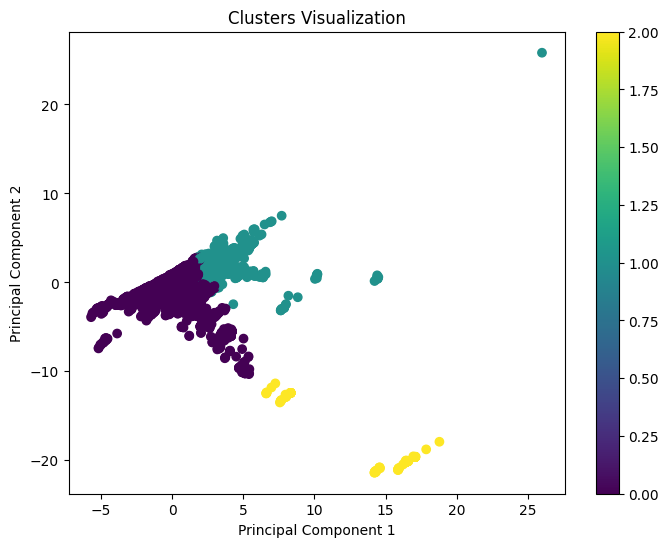

In [ ]:
principal_components_optimal_df['cluster'] = cluster_labels

# Now you can proceed with the analysis
for i in range(k):
    cluster = principal_components_optimal_df[principal_components_optimal_df['cluster'] == i]
    print(f"Cluster {i} contains {cluster.shape[0]} samples.")

# For visualization, use the DataFrame for plotting
if principal_components_optimal_df.shape[1] > 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(principal_components_optimal_df.iloc[:, 0], principal_components_optimal_df.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.title('Clusters Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()



In [ ]:
k = 3  # Number of clusters

# Now you can proceed with the analysis
for i in range(k):
    cluster = dataset[principal_components_optimal_df['cluster'] == i]  # Replace 'dataset' with your DataFrame name
    print(f"Cluster {i} contains {cluster.shape[0]} samples.")

    # List of columns you want to analyze
    columns_to_analyze = ['year', 'duration', 'avg_Durability_Weight', 'avg_SupStruc', 'tower_count']

    # Calculate and print summary statistics for selected columns
    cluster_stats = cluster[columns_to_analyze].describe()
    print(cluster_stats)




Cluster 0 contains 48805 samples.
               year      duration  avg_Durability_Weight  avg_SupStruc  \
count  48805.000000  48805.000000           48805.000000  48805.000000   
mean      -0.017231     -0.066070               0.058689     -0.058033   
std        1.015519      0.711814               0.965832      0.836632   
min       -3.373854     -0.564340              -2.679452     -2.108696   
25%       -0.539403     -0.515063              -0.514601     -0.565446   
50%        0.221059     -0.317955               0.026612     -0.043764   
75%        0.704990      0.174815               0.748229      0.393796   
max        1.465452      7.246067               1.830654     10.792178   

        tower_count  
count  48805.000000  
mean      -0.044198  
std        0.431653  
min       -0.157020  
25%       -0.117937  
50%       -0.091882  
75%       -0.052799  
max        9.848201  
Cluster 1 contains 4490 samples.
              year     duration  avg_Durability_Weight  avg_SupStruc

**`Cluster 0`**:
- This cluster contains `4,500` samples and appears to represent cellular towers in areas that experience relatively more significant impacts from natural disasters. The towers in this cluster have a higher average duration of impact, indicating that they are affected for longer periods.
- Additionally, they have higher values for `'avg_Durability_Weight`' and '`avg_SupStruc`,' which might suggest that these towers are more robust or have better durability. The '`tower_count`' is relatively low in this cluster.

**`Cluster 1:`**
- Cluster 1 is the largest cluster, containing `48,795` samples. These towers seem to be in areas with lower disaster impact.
- They have a lower average duration of impact and lower values for '`avg_Durability_Weight`' and '`avg_SupStruc`,' which could mean that they are less durable or resilient.
- The '`tower_count`' varies but is relatively lower on average.

**`Cluster 2:`**
- Cluster 2 is the smallest cluster, with only `147` samples. These towers are in areas with relatively low disaster impact, similar to **`Cluster 1`**.
- However, what sets them apart is their notably higher '`tower_count`,' suggesting that there might be a greater concentration of cellular towers in these areas.

It seems that **`Cluster 0`** represents towers in areas
prone to severe natural disasters, while **`Cluster 1`** represents towers in less disaster-prone areas. Cluster 2 is unique in that it has more towers in areas with low disaster impact.

This analysis can suggest focusing on areas with higher potential disaster impact (**`Cluster 0`**) and make informed decisions regarding tower durability, redundancy, and disaster recovery plans. Conversely, areas in **`Cluster 1`** might need less attention in terms of disaster preparedness. The insights from **`Cluster 2`** could guide in optimizing tower distribution in less disaster-prone regions.






In [ ]:
import pandas as pd

# Assuming you have already defined `dataset_unencoded` and `cluster_labels`

# Create a DataFrame to store the results
cluster_area_names_df = pd.DataFrame(columns=['Cluster', 'Designated_Areas_With_States'])

# Iterate through each cluster
for cluster_label in range(len(set(cluster_labels))):
    # Filter `dataset_unencoded` for the current cluster
    cluster_data = dataset_unencoded[cluster_labels == cluster_label]

    # Get the top 10 unique designated areas
    top_designated_areas = cluster_data['designated_area'].unique()[:10]

    # Create a list of "Designated Area, State" format for the top 10 areas
    areas_with_states = [f"{area}, {cluster_data[cluster_data['designated_area'] == area]['state'].iloc[0]}" for area in top_designated_areas]

    # Append the results to the DataFrame
    cluster_area_names_df = cluster_area_names_df.append({
        'Cluster': cluster_label,
        'Designated_Areas_With_States': areas_with_states
    }, ignore_index=True)

# Print the results
print(cluster_area_names_df)



  Cluster                       Designated_Areas_With_States
0       0  [STATEWIDE, GA, BAKER, GA, BLECKLEY, GA, BRYAN...
1       1  [FREESTONE, TX, LEON, TX, NAVARRO, TX, SMITH, ...
2       2                                    [STATEWIDE, TX]


<ipython-input-19-7be523f3cb56>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_area_names_df = cluster_area_names_df.append({
<ipython-input-19-7be523f3cb56>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_area_names_df = cluster_area_names_df.append({
<ipython-input-19-7be523f3cb56>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_area_names_df = cluster_area_names_df.append({


#Mapping

In [ ]:
'''us_shapefile_path = "/content/drive/My Drive//Datasets/cb_2018_us_county_500k.shp"
us_map = gpd.read_file(us_shapefile_path)'''

'us_shapefile_path = "/content/drive/My Drive//Datasets/cb_2018_us_county_500k.shp"\nus_map = gpd.read_file(us_shapefile_path)'

In [ ]:
#Stellar run
us_shapefile_path = "/content/drive/My Drive//Datasets/cb_2018_us_county_500k/cb_2018_us_county_500k.shp"
us_map = gpd.read_file(us_shapefile_path)

In [ ]:
print(us_map.columns)


Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [ ]:
# Check unique designated area names in dataset_unencoded
unique_designated_areas = dataset_unencoded['designated_area'].unique()

# Check unique county names in us_map GeoDataFrame
unique_county_names_map = us_map['NAME'].unique()

# Compare unique values
common_names = set(unique_designated_areas) & set(unique_county_names_map)

print("Common Names Between Designated Areas and Counties in us_map:")
for name in common_names:
    print(name)


Common Names Between Designated Areas and Counties in us_map:


In [ ]:
# Convert all designated area names to uppercase
uppercase_designated_areas = [area.upper() for area in unique_designated_areas]

# Check unique county names in us_map GeoDataFrame
unique_county_names_map = us_map['NAME'].unique()

# Convert all county names to uppercase
uppercase_county_names_map = [name.upper() for name in unique_county_names_map]

# Compare unique values in a case-insensitive manner
common_names = set(uppercase_designated_areas) & set(uppercase_county_names_map)

print("Common Names Between Designated Areas and Counties in us_map:\n")
i = 0
for name in common_names:
    i+=1
    if (i == 8):
      print()
      i = 0
    print(name, end=',')



Common Names Between Designated Areas and Counties in us_map:

CHAFFEE,CALCASIEU,POTTAWATTAMIE,MERCER,GREENUP,WESTCHESTER,CARTER,
LAWRENCE,CAMUY,OKEECHOBEE,KODIAK ISLAND,INDIANA,SCHUYLKILL,REFUGIO,FURNAS,
COCONINO,STARR,CURRITUCK,FREDERICK,HOOKER,BEAVERHEAD,PRINCE EDWARD,ALLEGANY,
TOMPKINS,SACRAMENTO,JOSEPHINE,MCDONOUGH,APPOMATTOX,LE FLORE,MORRILL,CRANE,
TOA BAJA,ACADIA,COCHISE,DESCHUTES,CLARE,CONVERSE,SUMTER,GOVE,
SWIFT,CABO ROJO,RANDOLPH,INDEPENDENCE,CUSTER,GILES,NESS,AITKIN,
RINGGOLD,WHITFIELD,JIM HOGG,CLOUD,TREMPEALEAU,EL DORADO,ST. LAWRENCE,OXFORD,
PERSHING,CHERRY,JUDITH BASIN,LE SUEUR,LAMAR,CHARLEVOIX,GASCONADE,OKTIBBEHA,
STARK,DURHAM,KAUAI,HAYWOOD,ESCAMBIA,GOSHEN,HUTCHINSON,NEW HANOVER,
YOUNG,BENZIE,STAFFORD,PEORIA,FOSTER,BATES,CAMPBELL,MUHLENBERG,
TATE,ELK,OHIO,SUMMERS,BALLARD,CAVALIER,KARNES,STONEWALL,
NOWATA,CRAIG,CANDLER,GADSDEN,MONMOUTH,ALCORN,OGLE,PUSHMATAHA,
UNION,WYOMING,ST. LUCIE,FILLMORE,BOX ELDER,SCREVEN,WALLACE,ST. LOUIS,
ARCHULETA,SUBLETTE,DEL NORTE,KOOTENAI,AUGUSTA

In [ ]:
# Convert all designated area names to uppercase
uppercase_designated_areas = [area.upper() for area in unique_designated_areas]

# Check unique county names in us_map GeoDataFrame
unique_county_names_map = us_map['NAME'].unique()

# Convert all county names to uppercase
uppercase_county_names_map = [name.upper() for name in unique_county_names_map]

# Find names in designated areas that don't match any county names
non_matching_names = set(uppercase_designated_areas) - set(uppercase_county_names_map)

print("Names in Designated Areas That Don't Match Any County Names in us_map:")
for name in non_matching_names:
    print(name)


Names in Designated Areas That Don't Match Any County Names in us_map:
WADE HAMPTON
SUFFOLK CITY
VIRGINIA BEACH CITY
DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)
PENUELAS
MAYAGUEZ
SAN SEBASTIAN
DONA ANA
CHESAPEAKE CITY
JUANA DIAZ
NORFOLK CITY
NEWPORT NEWS CITY
CANOVANAS
STATEWIDE
MANATI
EMPORIA CITY
RINCON
SAN GERMAN


In [ ]:
for miss in non_matching_names:
  for name in uppercase_county_names_map:
    #print(f'miss = {miss} and name = {name}')
    if name in miss:
      print(f'`{miss}` differs from `{name}`')

`WADE HAMPTON` differs from `HAMPTON`
`SUFFOLK CITY` differs from `SUFFOLK`
`VIRGINIA BEACH CITY` differs from `VIRGINIA BEACH`
`DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)` differs from `DISTRICT OF COLUMBIA`
`DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)` differs from `COLUMBIA`
`SAN SEBASTIAN` differs from `SEBASTIAN`
`CHESAPEAKE CITY` differs from `CHESAPEAKE`
`NORFOLK CITY` differs from `NORFOLK`
`NEWPORT NEWS CITY` differs from `NEWPORT`
`NEWPORT NEWS CITY` differs from `NEWPORT NEWS`
`STATEWIDE` differs from `TATE`
`EMPORIA CITY` differs from `EMPORIA`


In [ ]:
# Name correction:
name_mapp = {
    'VIRGINIA BEACH CITY': 'VIRGINIA BEACH',
    'EMPORIA CITY': 'EMPORIA',
    'NORFOLK CITY': 'NORFOLK',
    # 'SAN SEBASTIAN' 'SEBASTIAN',
    'DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT)': 'DISTRICT OF COLUMBIA',
    #DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT) differs from COLUMBIA
    'SUFFOLK CITY': 'SUFFOLK',
    #'WADE HAMPTON': 'HAMPTON',
    'NEWPORT NEWS CITY':'NEWPORT NEWS',
    'CHESAPEAKE CITY': 'CHESAPEAKE'
}


In [ ]:
# Assuming uppercase_designated_areas is a list of names
for i in range(len(uppercase_designated_areas)):
    if uppercase_designated_areas[i] in name_mapp:
        uppercase_designated_areas[i] = name_mapp[uppercase_designated_areas[i]]

In [ ]:
# Find names in designated areas that don't match any county names
non_matching_names = set(uppercase_designated_areas) - set(uppercase_county_names_map)

print("Names in Designated Areas That Don't Match Any County Names in us_map:")
for miss in non_matching_names:
  for name in uppercase_county_names_map:
    #print(f'miss = {miss} and name = {name}')
    if name in miss:
      print(f'`{miss}` differs from `{name}`')

Names in Designated Areas That Don't Match Any County Names in us_map:
`WADE HAMPTON` differs from `HAMPTON`
`SAN SEBASTIAN` differs from `SEBASTIAN`
`STATEWIDE` differs from `TATE`


In [ ]:
'''import matplotlib.pyplot as plt
import pandas as pd

# Convert the cluster_labels NumPy array to a Pandas Series
cluster_labels_series = pd.Series(cluster_labels)

# Create a list of unique cluster labels
unique_clusters = cluster_labels_series.unique()

# Create a colormap with a unique color for each cluster
colormap = plt.cm.get_cmap('Set1', len(unique_clusters))

# Create a dictionary to map cluster labels to colors
cluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}

matching_counties_gdf = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]

# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels
matching_counties_gdf['Cluster_Color'] = cluster_labels_series.map(cluster_colors)

# Set the figure size
fig, ax = plt.subplots(figsize=(50, 50))  # Adjust the figsize as needed

# Plot the map with clusters colored and labeled
matching_counties_gdf.plot(column='Cluster_Color', ax=ax, legend=False)
plt.legend(title='Cluster Labels', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Clustered Counties Map')
plt.axis('off')
plt.show()'''


"import matplotlib.pyplot as plt\nimport pandas as pd\n\n# Convert the cluster_labels NumPy array to a Pandas Series\ncluster_labels_series = pd.Series(cluster_labels)\n\n# Create a list of unique cluster labels\nunique_clusters = cluster_labels_series.unique()\n\n# Create a colormap with a unique color for each cluster\ncolormap = plt.cm.get_cmap('Set1', len(unique_clusters))\n\n# Create a dictionary to map cluster labels to colors\ncluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}\n\nmatching_counties_gdf = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]\n\n# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels\nmatching_counties_gdf['Cluster_Color'] = cluster_labels_series.map(cluster_colors)\n\n# Set the figure size\nfig, ax = plt.subplots(figsize=(50, 50))  # Adjust the figsize as needed\n\n# Plot the map with clusters colored and labeled\nmatching_counties_gdf.plot(column='Cluster_Color', ax=ax,

In [ ]:
'''from matplotlib.patches import Patch

# Convert the cluster_labels NumPy array to a Pandas Series
cluster_labels_series = pd.Series(cluster_labels)

# Create a list of unique cluster labels
unique_clusters = cluster_labels_series.unique()

# Create a colormap with a unique color for each cluster
colormap = plt.cm.get_cmap('Set1', len(unique_clusters))

# Create a dictionary to map cluster labels to colors
cluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}

# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels
matching_counties_gdf['Cluster_Color'] = cluster_labels_series
# Set the figure size
fig, ax = plt.subplots(figsize=(50, 50))  # Adjust the figsize as needed

# Plot each cluster with its assigned color
for cluster in unique_clusters:
    # Filter the dataframe for each cluster
    cluster_df = matching_counties_gdf[matching_counties_gdf['Cluster_Color'] == cluster]
    # Plot using the color from the colormap
    cluster_df.plot(ax=ax, color=colormap(cluster / len(unique_clusters)))

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for i, cluster in enumerate(unique_clusters)]

legend_handles = [Patch(color=colormap(i / len(unique_clusters)), label=f'Cluster {cluster}') for i, cluster in enumerate(unique_clusters)]
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Clustered Counties Map')
plt.axis('off')
plt.show()
# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in unique_clusters]
legend_colors = [cluster_colors[cluster] for cluster in unique_clusters]

# Plot the map with clusters colored
matching_counties_gdf.plot(column='Cluster_Color', ax=ax, legend=False)

# Display the custom legend
for label, color in zip(legend_labels, legend_colors):
    ax.plot([], [], color=color, label=label, linewidth=10)

ax.legend(title='Cluster Labels', loc='upper right', bbox_to_anchor=(1.2, 1))
fig.set_size_inches(100, 100)
plt.title('Clustered Counties Map')
plt.axis('off')
plt.show()'''


"from matplotlib.patches import Patch\n\n# Convert the cluster_labels NumPy array to a Pandas Series\ncluster_labels_series = pd.Series(cluster_labels)\n\n# Create a list of unique cluster labels\nunique_clusters = cluster_labels_series.unique()\n\n# Create a colormap with a unique color for each cluster\ncolormap = plt.cm.get_cmap('Set1', len(unique_clusters))\n\n# Create a dictionary to map cluster labels to colors\ncluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}\n\n# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels\nmatching_counties_gdf['Cluster_Color'] = cluster_labels_series\n# Set the figure size\nfig, ax = plt.subplots(figsize=(50, 50))  # Adjust the figsize as needed\n\n# Plot each cluster with its assigned color\nfor cluster in unique_clusters:\n    # Filter the dataframe for each cluster\n    cluster_df = matching_counties_gdf[matching_counties_gdf['Cluster_Color'] == cluster]\n    # Plot using the color

In [ ]:
'''import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

# ... (your code for preparing cluster_labels and matching_counties_gdf) ...

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 20))  # This can be adjusted as needed

# Plot the map with clusters colored
matching_counties_gdf.plot(column='Cluster_Color', ax=ax, legend=False)

# Set the bounds for the axes to focus on the contiguous US
# These numbers can be adjusted to zoom in closer or further out
x_lim = (-200, -60)  # These values might need adjustments
y_lim = (10, 80)  # These values might need adjustments
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in unique_clusters]
legend_colors = [cluster_colors[cluster] for cluster in unique_clusters]
custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
ax.legend(custom_lines, legend_labels, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1))

# Set the title and turn off the axis
plt.title('Clustered Counties Map')
plt.axis('off')

# Use tight_layout to automatically adjust subplot params so that the subplot(s) fits into the figure area
plt.tight_layout()

# Show the plot with a larger size
plt.show()'''



"import matplotlib.pyplot as plt\nimport pandas as pd\nimport geopandas as gpd\nimport numpy as np\n\n# ... (your code for preparing cluster_labels and matching_counties_gdf) ...\n\n# Set the figure size\nfig, ax = plt.subplots(figsize=(20, 20))  # This can be adjusted as needed\n\n# Plot the map with clusters colored\nmatching_counties_gdf.plot(column='Cluster_Color', ax=ax, legend=False)\n\n# Set the bounds for the axes to focus on the contiguous US\n# These numbers can be adjusted to zoom in closer or further out\nx_lim = (-200, -60)  # These values might need adjustments\ny_lim = (10, 80)  # These values might need adjustments\nax.set_xlim(x_lim)\nax.set_ylim(y_lim)\n\n# Create a custom legend\nlegend_labels = [f'Cluster {cluster}' for cluster in unique_clusters]\nlegend_colors = [cluster_colors[cluster] for cluster in unique_clusters]\ncustom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]\nax.legend(custom_lines, legend_labels, title='Cluster Labels',

In [ ]:
'''import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from matplotlib.colors import ListedColormap, BoundaryNorm

# ... (your code for preparing cluster_labels and matching_counties_gdf) ...

# Convert the cluster_labels NumPy array to a Pandas Series
cluster_labels_series = pd.Series(cluster_labels)

# Create a list of unique cluster labels
unique_clusters = cluster_labels_series.unique()

# Create a colormap with a unique color for each cluster
colormap = plt.cm.get_cmap('Set1', len(unique_clusters))

# Create a dictionary to map cluster labels to colors
cluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}

matching_counties_gdf = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]

# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels
matching_counties_gdf['Cluster_Color'] = cluster_labels_series

# Assuming 'Cluster_Color' is a numeric column, let's map it to colors
# Define the number of unique colors needed
num_colors = matching_counties_gdf['Cluster_Color'].nunique()

# Create a ListedColormap with a color for each unique value in 'Cluster_Color'
colormap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, num_colors)))

# Create a BoundaryNorm that will map the 'Cluster_Color' values to the colormap
norm = BoundaryNorm(range(num_colors+1), colormap.N)

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 20))  # This can be adjusted as needed

# Plot the map with clusters colored according to 'Cluster_Color'
# Use the colormap and norm we created
matching_counties_gdf.plot(column='Cluster_Color', ax=ax, cmap=colormap, norm=norm, legend=False)

# Set the bounds for the axes to focus on the contiguous US
x_lim = (-200, -60)  # These values might need adjustments
y_lim = (10, 80)  # These values might need adjustments
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Set the title and turn off the axis
plt.title('Clustered Counties Map')
plt.axis('off')

# Create a custom legend
# Get the labels and colors from the colormap
legend_labels = [f'Cluster {i}' for i in range(num_colors)]
legend_colors = [colormap(i) for i in range(num_colors)]

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
                  for label, color in zip(legend_labels, legend_colors)]

# Create and place the legend on the plot
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1), fontsize='15')

# Use tight_layout to automatically adjust subplot params so that the subplot(s) fits into the figure area
plt.tight_layout()

# Show the plot with a larger size
plt.show()'''





"import matplotlib.pyplot as plt\nimport pandas as pd\nimport geopandas as gpd\nfrom matplotlib.colors import ListedColormap, BoundaryNorm\n\n# ... (your code for preparing cluster_labels and matching_counties_gdf) ...\n\n# Convert the cluster_labels NumPy array to a Pandas Series\ncluster_labels_series = pd.Series(cluster_labels)\n\n# Create a list of unique cluster labels\nunique_clusters = cluster_labels_series.unique()\n\n# Create a colormap with a unique color for each cluster\ncolormap = plt.cm.get_cmap('Set1', len(unique_clusters))\n\n# Create a dictionary to map cluster labels to colors\ncluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}\n\nmatching_counties_gdf = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]\n\n# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels\nmatching_counties_gdf['Cluster_Color'] = cluster_labels_series\n\n# Assuming 'Cluster_Color' is a numeric column, let's map it 

In [ ]:
fips_to_state_abbrev = {
    '01': 'AL',  # Alabama
    '02': 'AK',  # Alaska
    '04': 'AZ',  # Arizona
    '05': 'AR',  # Arkansas
    '06': 'CA',  # California
    '08': 'CO',  # Colorado
    '09': 'CT',  # Connecticut
    '10': 'DE',  # Delaware
    '11': 'DC',  # District of Columbia
    '12': 'FL',  # Florida
    '13': 'GA',  # Georgia
    '15': 'HI',  # Hawaii
    '16': 'ID',  # Idaho
    '17': 'IL',  # Illinois
    '18': 'IN',  # Indiana
    '19': 'IA',  # Iowa
    '20': 'KS',  # Kansas
    '21': 'KY',  # Kentucky
    '22': 'LA',  # Louisiana
    '23': 'ME',  # Maine
    '24': 'MD',  # Maryland
    '25': 'MA',  # Massachusetts
    '26': 'MI',  # Michigan
    '27': 'MN',  # Minnesota
    '28': 'MS',  # Mississippi
    '29': 'MO',  # Missouri
    '30': 'MT',  # Montana
    '31': 'NE',  # Nebraska
    '32': 'NV',  # Nevada
    '33': 'NH',  # New Hampshire
    '34': 'NJ',  # New Jersey
    '35': 'NM',  # New Mexico
    '36': 'NY',  # New York
    '37': 'NC',  # North Carolina
    '38': 'ND',  # North Dakota
    '39': 'OH',  # Ohio
    '40': 'OK',  # Oklahoma
    '41': 'OR',  # Oregon
    '42': 'PA',  # Pennsylvania
    '44': 'RI',  # Rhode Island
    '45': 'SC',  # South Carolina
    '46': 'SD',  # South Dakota
    '47': 'TN',  # Tennessee
    '48': 'TX',  # Texas
    '49': 'UT',  # Utah
    '50': 'VT',  # Vermont
    '51': 'VA',  # Virginia
    '53': 'WA',  # Washington
    '54': 'WV',  # West Virginia
    '55': 'WI',  # Wisconsin
    '56': 'WY',  # Wyoming
    '60': 'AS',  # American Samoa
    '66': 'GU',  # Guam
    '69': 'MP',  # Northern Mariana Islands
    '72': 'PR',  # Puerto Rico
    '78': 'VI',  # Virgin Islands
}

In [ ]:
len(fips_to_state_abbrev)

56

In [ ]:
matching_counties_gdf_k_cluster = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]
matching_counties_gdf_k_cluster.shape

(3127, 10)

In [ ]:
principal_components_optimal_df['cluster'].unique()

array([0, 2, 1], dtype=int32)

In [ ]:
principal_components_optimal_df.shape

(53442, 38)

In [ ]:
dataset_with_k_cluster = dataset_unencoded[['state', 'designated_area']].copy()
dataset_with_k_cluster['k_cluster'] = principal_components_optimal_df['cluster']
dataset_with_k_cluster['k_cluster'].unique()

array([0, 2, 1], dtype=int32)

In [ ]:
temp = dataset_with_k_cluster.copy()

In [ ]:
dataset_with_k_cluster = temp.rename(columns={'state': 'STATE', 'designated_area': 'NAME'})
dataset_with_k_cluster

,STATE,NAME,k_cluster
0,GA,STATEWIDE,0
1,GA,STATEWIDE,0
2,GA,STATEWIDE,0
3,GA,STATEWIDE,0
4,GA,STATEWIDE,0
...,...,...,...
53437,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),0
53438,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),0
53439,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),0
53440,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),0


In [ ]:
dataset_with_k_cluster.drop_duplicates(inplace=True)

In [ ]:
dataset_with_k_cluster

,STATE,NAME,k_cluster
0,GA,STATEWIDE,0
6,GA,BAKER,0
7,GA,BLECKLEY,0
8,GA,BRYAN,0
9,GA,COBB,0
...,...,...,...
53296,UT,SALT LAKE,0
53299,UT,UTAH,0
53319,UT,STATEWIDE,0
53421,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),0


In [ ]:
'''k_cluster_statewide = dataset_with_k_cluster[dataset_with_k_cluster['NAME'] == 'STATEWIDE']
k_cluster_statewide.reset_index(inplace=True)
k_cluster_statewide'''

"k_cluster_statewide = dataset_with_k_cluster[dataset_with_k_cluster['NAME'] == 'STATEWIDE']\nk_cluster_statewide.reset_index(inplace=True)\nk_cluster_statewide"

In [ ]:
'''state_boundaries_gdf_match = state_boundaries_gdf.merge(k_cluster_statewide, on='STATE', how='left')
state_boundaries_gdf_match = state_boundaries_gdf_match.dropna(subset=['k_cluster'])
state_boundaries_gdf_match['k_cluster'].dtype'''

"state_boundaries_gdf_match = state_boundaries_gdf.merge(k_cluster_statewide, on='STATE', how='left')\nstate_boundaries_gdf_match = state_boundaries_gdf_match.dropna(subset=['k_cluster'])\nstate_boundaries_gdf_match['k_cluster'].dtype"

In [ ]:
'''state_boundaries_gdf_match['k_cluster'] = state_boundaries_gdf_match['k_cluster'].astype(int)
state_boundaries_gdf_match['k_cluster'].dtype'''

"state_boundaries_gdf_match['k_cluster'] = state_boundaries_gdf_match['k_cluster'].astype(int)\nstate_boundaries_gdf_match['k_cluster'].dtype"

**`Cluster 2` has only statewide areas in:**
- State: TX, Names: STATEWIDE
- State: FL, Names: STATEWIDE
- State: CA, Names: STATEWIDE
- State: NY, Names: STATEWIDE

In [ ]:
'''filter = dataset_with_k_cluster[dataset_with_k_cluster['k_cluster'] == 2]
unique_states = filter['STATE'].unique()
# For each state, find and print the unique names
for state in unique_states:
    # Get unique names for this state
    unique_names = filter[filter['STATE'] == state]['NAME'].unique()

    # Print state and its unique names
    print(f"State: {state}, Names: {', '.join(unique_names)}")'''

'filter = dataset_with_k_cluster[dataset_with_k_cluster[\'k_cluster\'] == 2]\nunique_states = filter[\'STATE\'].unique()\n# For each state, find and print the unique names\nfor state in unique_states:\n    # Get unique names for this state\n    unique_names = filter[filter[\'STATE\'] == state][\'NAME\'].unique()\n\n    # Print state and its unique names\n    print(f"State: {state}, Names: {\', \'.join(unique_names)}")'

In [ ]:
'''for cluster in dataset_with_k_cluster['k_cluster'].unique():
  print(f"Cluster: {cluster}")
  # Filter the DataFrame for the current cluster
  cluster_data = dataset_with_k_cluster[dataset_with_k_cluster['k_cluster'] == cluster]

  # Get unique states in this cluster
  unique_states = cluster_data['STATE'].unique()

  for state in unique_states:
    # Get unique names for this state in the current cluster
    unique_names = cluster_data[cluster_data['STATE'] == state]['NAME'].unique()

    # Print state and its unique names
    print(f"State: {state}, Names: {', '.join(unique_names)}")'''

'for cluster in dataset_with_k_cluster[\'k_cluster\'].unique():\n  print(f"Cluster: {cluster}")\n  # Filter the DataFrame for the current cluster\n  cluster_data = dataset_with_k_cluster[dataset_with_k_cluster[\'k_cluster\'] == cluster]\n\n  # Get unique states in this cluster\n  unique_states = cluster_data[\'STATE\'].unique()\n\n  for state in unique_states:\n    # Get unique names for this state in the current cluster\n    unique_names = cluster_data[cluster_data[\'STATE\'] == state][\'NAME\'].unique()\n\n    # Print state and its unique names\n    print(f"State: {state}, Names: {\', \'.join(unique_names)}")'

In [ ]:
'''# Define custom aggregation functions
def unique_list(series):
    return list(series.unique())

# Group by 'STATE' and aggregate the unique clusters and names
state_cluster_name = matching_counties_gdf_k_cluster.groupby('STATE').agg({'k_cluster': unique_list, 'NAME': unique_list})

# Iterate through each state to find and print conflicts
for state, data in state_cluster_name.iterrows():
    clusters = data['k_cluster']
    names = data['NAME']

    # Check for conflicts: multiple clusters for the same or similar names
    if len(clusters) > 1:
        print(f"State: {state}")
        print(f"  Clusters: {clusters}")
        print(f"  Names: {', '.join(names)}")
        print("\n")'''

'# Define custom aggregation functions\ndef unique_list(series):\n    return list(series.unique())\n\n# Group by \'STATE\' and aggregate the unique clusters and names\nstate_cluster_name = matching_counties_gdf_k_cluster.groupby(\'STATE\').agg({\'k_cluster\': unique_list, \'NAME\': unique_list})\n\n# Iterate through each state to find and print conflicts\nfor state, data in state_cluster_name.iterrows():\n    clusters = data[\'k_cluster\']\n    names = data[\'NAME\']\n\n    # Check for conflicts: multiple clusters for the same or similar names\n    if len(clusters) > 1:\n        print(f"State: {state}")\n        print(f"  Clusters: {clusters}")\n        print(f"  Names: {\', \'.join(names)}")\n        print("\n")'

In [ ]:
'''# Initialize an empty dictionary to hold the conflict information
conflicts = {}

# Iterate through each row in the DataFrame
for state, row in state_cluster_name.iterrows():
    # Check if there's a conflict (more than one cluster)
    if len(row['k_cluster']) > 1:
        # If so, add the state and the conflicting names to the dictionary
        conflicts[state] = row['NAME']

# Now `conflicts` will contain each state with more than one cluster,
# along with the names associated with those clusters.

# If you want to print out the conflicts
for state, names in conflicts.items():
    print(f"State: {state}, Conflicts in: {', '.join(names)}")'''

'# Initialize an empty dictionary to hold the conflict information\nconflicts = {}\n\n# Iterate through each row in the DataFrame\nfor state, row in state_cluster_name.iterrows():\n    # Check if there\'s a conflict (more than one cluster)\n    if len(row[\'k_cluster\']) > 1:\n        # If so, add the state and the conflicting names to the dictionary\n        conflicts[state] = row[\'NAME\']\n\n# Now `conflicts` will contain each state with more than one cluster,\n# along with the names associated with those clusters.\n\n# If you want to print out the conflicts\nfor state, names in conflicts.items():\n    print(f"State: {state}, Conflicts in: {\', \'.join(names)}")'

In [ ]:
'''# Filter and plot
fig, ax = plt.subplots(figsize=(15, 10))
for state, names in conflicts.items():
    for name in names:
        # Filter data for each area
        area_data = matching_counties_gdf_k_cluster[(matching_counties_gdf_k_cluster['STATE'] == state) & (matching_counties_gdf_k_cluster['NAME'] == name)]

        # Plot each cluster within the area
        if not area_data.empty:
            for cluster in area_data['k_cluster'].unique():
                cluster_data = area_data[area_data['k_cluster'] == cluster]
                cluster_data.plot(ax=ax, label=f'State: {state}, Name: {name}, Cluster: {cluster}')

# Customize the plot
plt.legend()
plt.show()'''

"# Filter and plot\nfig, ax = plt.subplots(figsize=(15, 10))\nfor state, names in conflicts.items():\n    for name in names:\n        # Filter data for each area\n        area_data = matching_counties_gdf_k_cluster[(matching_counties_gdf_k_cluster['STATE'] == state) & (matching_counties_gdf_k_cluster['NAME'] == name)]\n\n        # Plot each cluster within the area\n        if not area_data.empty:\n            for cluster in area_data['k_cluster'].unique():\n                cluster_data = area_data[area_data['k_cluster'] == cluster]\n                cluster_data.plot(ax=ax, label=f'State: {state}, Name: {name}, Cluster: {cluster}')\n\n# Customize the plot\nplt.legend()\nplt.show()"

## **With `STATEWIDE`:**

In [ ]:
us_map_copy = us_map.copy()
us_map_copy['NAME'] = us_map_copy['NAME'].str.upper()
us_map_copy['STATE'] = us_map_copy['STATEFP'].map(fips_to_state_abbrev)

In [ ]:
matching_counties_gdf_k_cluster = us_map_copy.merge(dataset_with_k_cluster, how='inner', on=['STATE', 'NAME'])
matching_counties_gdf_k_cluster

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STATE,k_cluster
0,21,007,00516850,0500000US21007,21007,BALLARD,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",KY,0
1,21,017,00516855,0500000US21017,21017,BOURBON,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",KY,0
2,21,031,00516862,0500000US21031,21031,BUTLER,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",KY,0
3,21,065,00516879,0500000US21065,21065,ESTILL,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",KY,0
4,21,069,00516881,0500000US21069,21069,FLEMING,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",KY,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3134,31,073,00835858,0500000US31073,31073,GOSPER,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",NE,0
3135,39,075,01074050,0500000US39075,39075,HOLMES,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",OH,0
3136,48,171,01383871,0500000US48171,48171,GILLESPIE,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",TX,1
3137,55,079,01581100,0500000US55079,55079,MILWAUKEE,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",WI,0


**While `cluster 2` has only statewide areas, the `matching_counties_gdf_k_cluster` has only 2 clusters `0` and `1`:**

In [ ]:
matching_counties_gdf_k_cluster['k_cluster'].unique()

array([0, 1], dtype=int32)

In [ ]:
'''# Define custom aggregation functions
def unique_list(series):
    return list(series.unique())

# Group by 'STATE' and aggregate the unique clusters and names
state_cluster_name = matching_counties_gdf_k_cluster.groupby('STATE').agg({'k_cluster': unique_list, 'NAME': unique_list})

# Iterate through each state to find and print conflicts
for state, data in state_cluster_name.iterrows():
    clusters = data['k_cluster']
    names = data['NAME']

    # Check for conflicts: multiple clusters for the same or similar names
    if len(clusters) > 1:
        print(f"State: {state}")
        print(f"  Clusters: {clusters}")
        print(f"  Names: {', '.join(names)}")
        print("\n")'''

'# Define custom aggregation functions\ndef unique_list(series):\n    return list(series.unique())\n\n# Group by \'STATE\' and aggregate the unique clusters and names\nstate_cluster_name = matching_counties_gdf_k_cluster.groupby(\'STATE\').agg({\'k_cluster\': unique_list, \'NAME\': unique_list})\n\n# Iterate through each state to find and print conflicts\nfor state, data in state_cluster_name.iterrows():\n    clusters = data[\'k_cluster\']\n    names = data[\'NAME\']\n\n    # Check for conflicts: multiple clusters for the same or similar names\n    if len(clusters) > 1:\n        print(f"State: {state}")\n        print(f"  Clusters: {clusters}")\n        print(f"  Names: {\', \'.join(names)}")\n        print("\n")'

###**Conflicted areas among clusters:**

In [ ]:
def unique_list(series):
    return list(series.unique())

# Group by 'STATE' and aggregate the unique clusters and names
state_cluster_name = matching_counties_gdf_k_cluster.groupby('STATE').agg({'k_cluster': unique_list, 'NAME': unique_list})
# Initialize an empty dictionary to hold the conflict information
conflicts = {}

# Iterate through each row in the DataFrame
for state, row in state_cluster_name.iterrows():
    # Check if there's a conflict (more than one cluster)
    if len(row['k_cluster']) > 1:
        # If so, add the state and the conflicting names to the dictionary
        conflicts[state] = row['NAME']

# Now `conflicts` will contain each state with more than one cluster,
# along with the names associated with those clusters.

# If you want to print out the conflicts
for state, names in conflicts.items():
    print(f"State: {state}, Conflicts in: {', '.join(names)}")

State: CA, Conflicts in: ALAMEDA, ALPINE, AMADOR, CONTRA COSTA, FRESNO, HUMBOLDT, LAKE, LOS ANGELES, MERCED, NEVADA, SAN MATEO, SANTA CLARA, YUBA, MENDOCINO, MONO, NAPA, ORANGE, SAN BENITO, SAN DIEGO, SAN LUIS OBISPO, SANTA BARBARA, SONOMA, SUTTER, TULARE, YOLO, MADERA, CALAVERAS, MARIPOSA, SOLANO, PLUMAS, SISKIYOU, INYO, MONTEREY, STANISLAUS, SIERRA, SHASTA, COLUSA, MARIN, SAN JOAQUIN, KINGS, LASSEN, SAN FRANCISCO, GLENN, IMPERIAL, PLACER, TUOLUMNE, VENTURA, TEHAMA, MODOC, SANTA CRUZ, TRINITY, KERN, SAN BERNARDINO, EL DORADO, SACRAMENTO, BUTTE, DEL NORTE, RIVERSIDE
State: HI, Conflicts in: KAUAI, HAWAII, MAUI, HONOLULU
State: KS, Conflicts in: ELLSWORTH, KINGMAN, NESS, WALLACE, GRAY, OTTAWA, SHERMAN, COMANCHE, POTTAWATOMIE, HODGEMAN, WICHITA, GRAHAM, GRANT, TREGO, LINCOLN, LOGAN, LYON, MCPHERSON, ELK, FORD, JOHNSON, KIOWA, LANE, GOVE, GREENWOOD, HARPER, JACKSON, ALLEN, BARTON, BUTLER, CLARK, CLOUD, DONIPHAN, JEFFERSON, JEWELL, CHEYENNE, BROWN, DOUGLAS, ELLIS, FINNEY, SEDGWICK, SHAWNEE

In [ ]:
'''# Filter and plot
fig, ax = plt.subplots(figsize=(15, 10))
for state, names in conflicts.items():
    for name in names:
        # Filter data for each area
        area_data = matching_counties_gdf_k_cluster[(matching_counties_gdf_k_cluster['STATE'] == state) & (matching_counties_gdf_k_cluster['NAME'] == name)]

        # Plot each cluster within the area
        if not area_data.empty:
            for cluster in area_data['k_cluster'].unique():
                cluster_data = area_data[area_data['k_cluster'] == cluster]
                cluster_data.plot(ax=ax, label=f'State: {state}, Name: {name}, Cluster: {cluster}')

# Customize the plot
plt.legend()
plt.show()'''

"# Filter and plot\nfig, ax = plt.subplots(figsize=(15, 10))\nfor state, names in conflicts.items():\n    for name in names:\n        # Filter data for each area\n        area_data = matching_counties_gdf_k_cluster[(matching_counties_gdf_k_cluster['STATE'] == state) & (matching_counties_gdf_k_cluster['NAME'] == name)]\n\n        # Plot each cluster within the area\n        if not area_data.empty:\n            for cluster in area_data['k_cluster'].unique():\n                cluster_data = area_data[area_data['k_cluster'] == cluster]\n                cluster_data.plot(ax=ax, label=f'State: {state}, Name: {name}, Cluster: {cluster}')\n\n# Customize the plot\nplt.legend()\nplt.show()"

### **Plotting:**

In [ ]:
np.unique(cluster_labels)

array([0, 1, 2], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from matplotlib.colors import ListedColormap, BoundaryNorm

# Convert the cluster_labels NumPy array to a Pandas Series
cluster_labels_series = pd.Series(cluster_labels)

# Create a list of unique cluster labels
unique_clusters = cluster_labels_series.unique()
unique_clusters = sorted(unique_clusters)

# Create a colormap with a unique color for each cluster
# colormap = plt.cm.get_cmap('Set1', len(unique_clusters))
colormap = ListedColormap(['green', 'purple', 'yellow'])

# Create a dictionary to map cluster labels to colors
cluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}

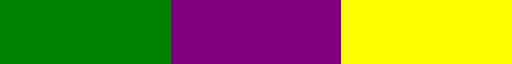

In [ ]:
colormap

In [ ]:
cluster_colors

{0: (0.0, 0.5019607843137255, 0.0, 1.0),
 1: (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 2: (1.0, 1.0, 0.0, 1.0)}

In [ ]:
matching_counties_gdf_k_cluster['k_cluster_colors'] = matching_counties_gdf_k_cluster['k_cluster'].map(cluster_colors)
matching_counties_gdf_k_cluster

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STATE,k_cluster,k_cluster_colors
0,21,007,00516850,0500000US21007,21007,BALLARD,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",KY,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
1,21,017,00516855,0500000US21017,21017,BOURBON,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",KY,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
2,21,031,00516862,0500000US21031,21031,BUTLER,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",KY,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
3,21,065,00516879,0500000US21065,21065,ESTILL,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",KY,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
4,21,069,00516881,0500000US21069,21069,FLEMING,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",KY,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,31,073,00835858,0500000US31073,31073,GOSPER,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",NE,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
3135,39,075,01074050,0500000US39075,39075,HOLMES,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",OH,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
3136,48,171,01383871,0500000US48171,48171,GILLESPIE,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",TX,1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
3137,55,079,01581100,0500000US55079,55079,MILWAUKEE,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",WI,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"


In [ ]:
# len(conflicts)

In [ ]:
matching_counties_gdf_k_cluster['k_cluster_colors'].unique()

array([(0.0, 0.5019607843137255, 0.0, 1.0),
       (0.5019607843137255, 0.0, 0.5019607843137255, 1.0)], dtype=object)

In [ ]:
matching_counties_gdf_k_cluster['k_cluster'].value_counts()

0    2857
1     282
Name: k_cluster, dtype: int64

In [ ]:
'''# Generate a random color for each conflict
random_colors = plt.cm.tab20(np.random.choice(range(20), len(conflicts), replace=False))
# Now, iterate over the conflicted areas and plot them with a different color scheme
conflict_colormap = ListedColormap(random_colors)
for state, areas in conflicts.items():
    for area in areas:
        # Filter data for each conflicted area
        area_data = matching_counties_gdf_k_cluster[
            (matching_counties_gdf_k_cluster['STATE'] == state) &
            (matching_counties_gdf_k_cluster['NAME'].isin(areas))
        ]
        # Plot each conflicted area with the conflict colormap
        area_data.plot(ax=ax, column='K_cluster_colors', cmap=conflict_colormap, norm=norm, legend=False)'''

"# Generate a random color for each conflict\nrandom_colors = plt.cm.tab20(np.random.choice(range(20), len(conflicts), replace=False))\n# Now, iterate over the conflicted areas and plot them with a different color scheme\nconflict_colormap = ListedColormap(random_colors)\nfor state, areas in conflicts.items():\n    for area in areas:\n        # Filter data for each conflicted area\n        area_data = matching_counties_gdf_k_cluster[\n            (matching_counties_gdf_k_cluster['STATE'] == state) &\n            (matching_counties_gdf_k_cluster['NAME'].isin(areas))\n        ]\n        # Plot each conflicted area with the conflict colormap\n        area_data.plot(ax=ax, column='K_cluster_colors', cmap=conflict_colormap, norm=norm, legend=False)"

In [ ]:
matching_counties_gdf_k_cluster.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'STATE', 'k_cluster',
       'k_cluster_colors'],
      dtype='object')

In [ ]:
matching_counties_gdf_k_cluster = matching_counties_gdf_k_cluster[['STATEFP', 'NAME', 'geometry',
                                                                   'STATE', 'k_cluster', 'k_cluster_colors']]

In [ ]:
state_boundaries_gdf = us_map.dissolve(by='STATEFP')

In [ ]:
'''# Assuming 'Cluster_Color' is a numeric column, let's map it to colors
num_colors = matching_counties_gdf_k_cluster['k_cluster_colors'].nunique()
# colormap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, num_colors)))
norm = BoundaryNorm(range(num_colors+1), colormap.N)

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 50))

# Plot the counties with clusters colored according to 'Cluster_Color'
matching_counties_gdf_k_cluster.plot(column='k_cluster_colors', ax=ax, cmap=colormap, norm=norm, legend=False)

# Overlay state boundaries
state_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Annotate with state abbreviations
for idx, row in state_boundaries_gdf.iterrows():
    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code
    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):
        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=15, color='black')

# Set the bounds for the axes
ax.set_xlim((-200, -60))
ax.set_ylim((10, 80))

# Create a custom legend
legend_labels = [f'Cluster {i}' for i in range(num_colors)]
legend_colors = [colormap(i) for i in range(num_colors)]
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1), fontsize='15')

# Set the title and turn off the axis
plt.title('Clustered Counties Map')
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()'''

"# Assuming 'Cluster_Color' is a numeric column, let's map it to colors\nnum_colors = matching_counties_gdf_k_cluster['k_cluster_colors'].nunique()\n# colormap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, num_colors)))\nnorm = BoundaryNorm(range(num_colors+1), colormap.N)\n\n# Set the figure size\nfig, ax = plt.subplots(figsize=(30, 50))\n\n# Plot the counties with clusters colored according to 'Cluster_Color'\nmatching_counties_gdf_k_cluster.plot(column='k_cluster_colors', ax=ax, cmap=colormap, norm=norm, legend=False)\n\n# Overlay state boundaries\nstate_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)\n\n# Annotate with state abbreviations\nfor idx, row in state_boundaries_gdf.iterrows():\n    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code\n    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):\n        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].cen

In [ ]:
'''import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from matplotlib.colors import ListedColormap, BoundaryNorm

# Convert the cluster_labels NumPy array to a Pandas Series
cluster_labels_series = pd.Series(cluster_labels)

# Create a list of unique cluster labels
unique_clusters = cluster_labels_series.unique()

# Create a colormap with a unique color for each cluster
colormap = plt.cm.get_cmap('Set1', len(unique_clusters))

# Create a dictionary to map cluster labels to colors
cluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}

matching_counties_gdf = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]

# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels
matching_counties_gdf['Cluster_Color'] = cluster_labels_series

# Assuming 'Cluster_Color' is a numeric column, let's map it to colors
num_colors = matching_counties_gdf['Cluster_Color'].nunique()
colormap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, num_colors)))
norm = BoundaryNorm(range(num_colors+1), colormap.N)

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 50))

# Plot the counties with clusters colored according to 'Cluster_Color'
matching_counties_gdf.plot(column='Cluster_Color', ax=ax, cmap=colormap, norm=norm, legend=False)

# Overlay state boundaries
state_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Annotate with state abbreviations
for idx, row in state_boundaries_gdf.iterrows():
    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code
    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):
        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=15, color='red')

# Set the bounds for the axes
ax.set_xlim((-200, -60))
ax.set_ylim((10, 80))

# Create a custom legend
legend_labels = [f'Cluster {i}' for i in range(num_colors)]
legend_colors = [colormap(i) for i in range(num_colors)]
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1), fontsize='15')

# Set the title and turn off the axis
plt.title('Clustered Counties Map')
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()'''

"import matplotlib.pyplot as plt\nimport pandas as pd\nimport geopandas as gpd\nfrom matplotlib.colors import ListedColormap, BoundaryNorm\n\n# Convert the cluster_labels NumPy array to a Pandas Series\ncluster_labels_series = pd.Series(cluster_labels)\n\n# Create a list of unique cluster labels\nunique_clusters = cluster_labels_series.unique()\n\n# Create a colormap with a unique color for each cluster\ncolormap = plt.cm.get_cmap('Set1', len(unique_clusters))\n\n# Create a dictionary to map cluster labels to colors\ncluster_colors = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters)}\n\nmatching_counties_gdf = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]\n\n# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels\nmatching_counties_gdf['Cluster_Color'] = cluster_labels_series\n\n# Assuming 'Cluster_Color' is a numeric column, let's map it to colors\nnum_colors = matching_counties_gdf['Cluster_Color'].nunique()\ncolorm

## **`STATEWIDE`:**

In [ ]:
us_map.shape

NameError: ignored

In [ ]:
k_cluster_statewide = dataset_with_k_cluster[dataset_with_k_cluster['NAME'] == 'STATEWIDE']
k_cluster_statewide.columns

Index(['STATE', 'NAME', 'k_cluster'], dtype='object')

In [ ]:
len(k_cluster_statewide['STATE'].unique())

55

In [ ]:
states_gdf = us_map.dissolve(by='STATEFP')
states_gdf.reset_index(inplace=True)

In [ ]:
states_gdf.shape

(56, 10)

In [ ]:
states_gdf.columns

Index(['STATEFP', 'geometry', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID',
       'NAME', 'LSAD', 'ALAND', 'AWATER'],
      dtype='object')

In [ ]:
states_gdf['STATE'] = states_gdf['STATEFP'].map(fips_to_state_abbrev)
states_gdf

,STATEFP,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,STATE
0,01,"MULTIPOLYGON (((-88.22462 30.24556, -88.20147 ...",001,00161526,0500000US01001,01001,Autauga,06,1539602123,25706961,AL
1,02,"MULTIPOLYGON (((-179.13001 51.29042, -179.1282...",016,01419965,0500000US02016,02016,Aleutians West,05,11375510886,25186009907,AK
2,04,"POLYGON ((-111.45108 31.45320, -111.56019 31.4...",005,00025443,0500000US04005,04005,Coconino,06,48222143094,110123852,AZ
3,05,"POLYGON ((-93.07069 33.01779, -93.07317 33.017...",011,00063757,0500000US05011,05011,Bradley,06,1681514472,9532926,AR
4,06,"MULTIPOLYGON (((-122.50202 37.59928, -122.5013...",001,01675839,0500000US06001,06001,Alameda,06,1909598013,216923745,CA
5,08,"POLYGON ((-105.99747 36.99542, -106.00632 36.9...",013,00198122,0500000US08013,08013,Boulder,06,1881290197,36512644,CO
6,09,"MULTIPOLYGON (((-73.62272 40.98456, -73.62186 ...",009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242,CT
7,10,"MULTIPOLYGON (((-75.31154 38.94463, -75.31591 ...",005,00217269,0500000US10005,10005,Sussex,06,2424543661,674175861,DE
8,11,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",001,01702382,0500000US11001,11001,District of Columbia,00,158340391,18687198,DC
9,12,"MULTIPOLYGON (((-82.86414 24.62473, -82.86439 ...",009,00295749,0500000US12009,12009,Brevard,06,2629306677,1403367455,FL


In [ ]:
state_gdf_match = states_gdf.merge(k_cluster_statewide, on='STATE', how='left')
state_gdf_match = state_gdf_match.dropna(subset=['k_cluster'])
state_gdf_match['k_cluster'].dtype

dtype('float64')

In [ ]:
state_gdf_match['k_cluster'] = state_gdf_match['k_cluster'].astype(int)
state_gdf_match['k_cluster'].dtype

dtype('int64')

In [ ]:
'''statewide_cluster_labels = state_gdf_match['k_cluster']
statewide_cluster = statewide_cluster_labels.unique()
color_map_state = ListedColormap(['green', 'purple', 'yellow'])
cluster_colors_statewide = {cluster: color_map_state(i) for i, cluster in enumerate(statewide_cluster)}'''

"statewide_cluster_labels = state_gdf_match['k_cluster']\nstatewide_cluster = statewide_cluster_labels.unique()\ncolor_map_state = ListedColormap(['green', 'purple', 'yellow'])\ncluster_colors_statewide = {cluster: color_map_state(i) for i, cluster in enumerate(statewide_cluster)}"

In [ ]:
# statewide_cluster_labels.unique()

In [ ]:
# cluster_colors_statewide

In [ ]:
# color_map_state

In [ ]:
state_gdf_match['k_cluster_colors'] = state_gdf_match['k_cluster'].map(cluster_colors)
state_gdf_match.columns

Index(['STATEFP', 'geometry', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID',
       'NAME_x', 'LSAD', 'ALAND', 'AWATER', 'STATE', 'NAME_y', 'k_cluster',
       'k_cluster_colors'],
      dtype='object')

In [ ]:
state_gdf_match = state_gdf_match.rename(columns = {'NAME_y': 'NAME'})

In [ ]:
state_gdf_match = state_gdf_match[['STATEFP', 'geometry', 'STATE', 'NAME', 'k_cluster', 'k_cluster_colors']]

In [ ]:
state_gdf_match.columns

Index(['STATEFP', 'geometry', 'STATE', 'NAME', 'k_cluster',
       'k_cluster_colors'],
      dtype='object')

In [ ]:
state_gdf_match.shape

(56, 6)

In [ ]:
matching_counties_gdf_k_cluster.shape

(3139, 6)

In [ ]:
'''num_colors_state = state_gdf_match['k_cluster_colors'].nunique()
num_colors_state'''

"num_colors_state = state_gdf_match['k_cluster_colors'].nunique()\nnum_colors_state"

In [ ]:
state_boundaries_gdf = us_map.dissolve(by='STATEFP')

In [ ]:
'''norm = BoundaryNorm(range(num_colors_state+1), color_map_state.N)

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 50))

# Plot the counties with clusters colored according to 'Cluster_Color'
state_gdf_match.plot(column='k_cluster_colors', ax=ax, cmap=color_map_state, norm=norm, legend=False)

#matching_counties_gdf_k_cluster.plot(column='K_cluster_colors', ax=ax, cmap=colormap, norm=norm, legend=False)

# Overlay state boundaries
state_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Annotate with state abbreviations
for idx, row in state_boundaries_gdf.iterrows():
    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code
    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):
        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=15, color='black')

# Set the bounds for the axes
ax.set_xlim((-200, -60))
ax.set_ylim((10, 80))

# Create a custom legend
legend_labels = [f'Cluster {i}' for i in range(num_colors_state)]
legend_colors = [color_map_state(i) for i in range(num_colors_state)]
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1), fontsize='15')


# Set the title and turn off the axis
plt.title('Clustered Statewide Map')
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()'''

"norm = BoundaryNorm(range(num_colors_state+1), color_map_state.N)\n\n# Set the figure size\nfig, ax = plt.subplots(figsize=(30, 50))\n\n# Plot the counties with clusters colored according to 'Cluster_Color'\nstate_gdf_match.plot(column='k_cluster_colors', ax=ax, cmap=color_map_state, norm=norm, legend=False)\n\n#matching_counties_gdf_k_cluster.plot(column='K_cluster_colors', ax=ax, cmap=colormap, norm=norm, legend=False)\n\n# Overlay state boundaries\nstate_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)\n\n# Annotate with state abbreviations\nfor idx, row in state_boundaries_gdf.iterrows():\n    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code\n    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):\n        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),\n                     horizontalalignment='center', fontsize=15, color='black')\n\n# Set the bo

In [ ]:
cluster_colors

{0: (0.0, 0.5019607843137255, 0.0, 1.0),
 1: (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 2: (1.0, 1.0, 0.0, 1.0)}

In [ ]:
state_gdf_match

,STATEFP,geometry,STATE,NAME,k_cluster,k_cluster_colors
0,01,"MULTIPOLYGON (((-88.22462 30.24556, -88.20147 ...",AL,STATEWIDE,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
1,02,"MULTIPOLYGON (((-179.13001 51.29042, -179.1282...",AK,STATEWIDE,1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
2,04,"POLYGON ((-111.45108 31.45320, -111.56019 31.4...",AZ,STATEWIDE,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
3,04,"POLYGON ((-111.45108 31.45320, -111.56019 31.4...",AZ,STATEWIDE,1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
4,05,"POLYGON ((-93.07069 33.01779, -93.07317 33.017...",AR,STATEWIDE,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
5,06,"MULTIPOLYGON (((-122.50202 37.59928, -122.5013...",CA,STATEWIDE,2,"(1.0, 1.0, 0.0, 1.0)"
6,08,"POLYGON ((-105.99747 36.99542, -106.00632 36.9...",CO,STATEWIDE,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
7,09,"MULTIPOLYGON (((-73.62272 40.98456, -73.62186 ...",CT,STATEWIDE,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
8,10,"MULTIPOLYGON (((-75.31154 38.94463, -75.31591 ...",DE,STATEWIDE,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"
9,11,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",DC,STATEWIDE,0,"(0.0, 0.5019607843137255, 0.0, 1.0)"


In [ ]:
cluster_colors


{0: (0.0, 0.5019607843137255, 0.0, 1.0),
 1: (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 2: (1.0, 1.0, 0.0, 1.0)}

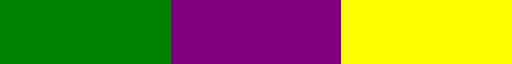

In [ ]:
colormap

In [ ]:
k_cluster_0 = matching_counties_gdf_k_cluster[matching_counties_gdf_k_cluster['k_cluster'] == 0]
k_cluster_1 = matching_counties_gdf_k_cluster[matching_counties_gdf_k_cluster['k_cluster'] == 1]
k_cluster_2 = matching_counties_gdf_k_cluster[matching_counties_gdf_k_cluster['k_cluster'] == 2]
print(f'0: {k_cluster_0.shape}')
print(f'1: {k_cluster_1.shape}')
print(f'2: {k_cluster_2.shape}') # exclude

0: (2857, 6)
1: (282, 6)
2: (0, 6)


In [ ]:
state_k_cluster_0 = state_gdf_match[state_gdf_match['k_cluster'] == 0]
state_k_cluster_1 = state_gdf_match[state_gdf_match['k_cluster'] == 1]
state_k_cluster_2 = state_gdf_match[state_gdf_match['k_cluster'] == 2]
print(f'0: {state_k_cluster_0.shape}')
print(f'1: {state_k_cluster_1.shape}')
print(f'2: {state_k_cluster_2.shape}')

0: (50, 6)
1: (2, 6)
2: (4, 6)


In [ ]:
color0 = (0.0, 0.5019607843137255, 0.0, 1.0)
color1 = (0.5019607843137255, 0.0, 0.5019607843137255, 1.0)
color2 = (1.0, 1.0, 0.0, 1.0)

### K-cluster Map

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


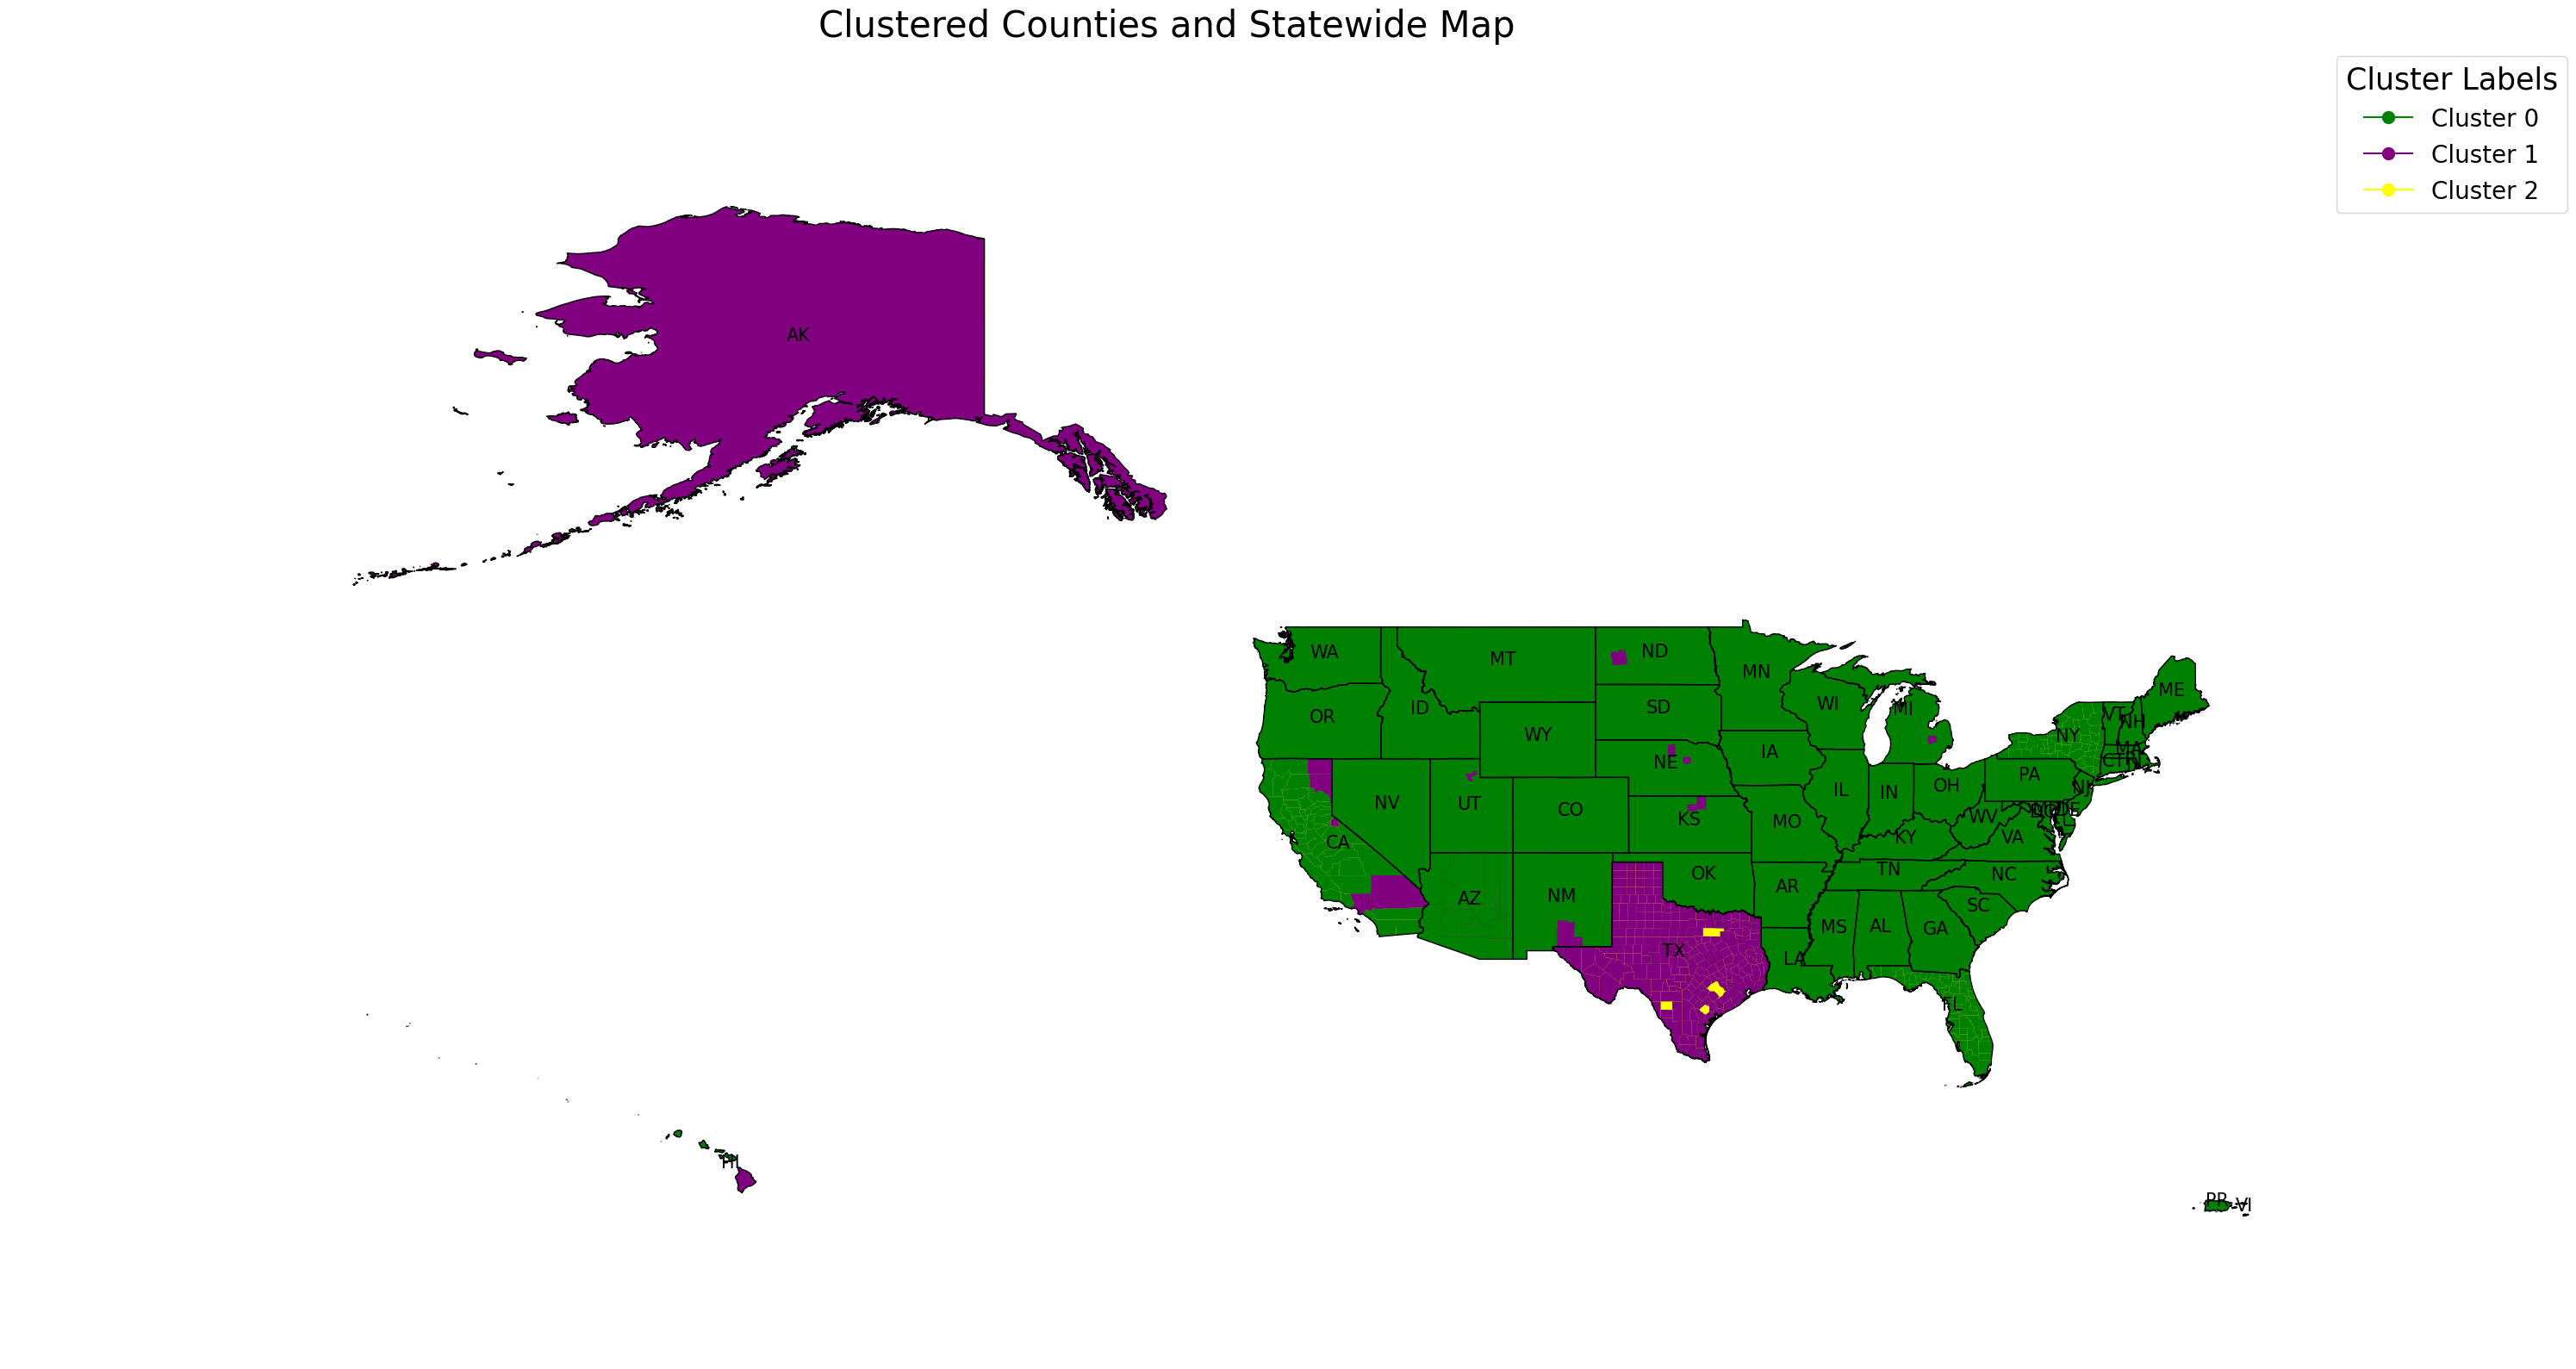

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(30, 50))

# Plot the counties with clusters colored according to
state_k_cluster_0.plot(column='k_cluster', ax=ax, color=color0, legend=False)
state_k_cluster_1.plot(column='k_cluster', ax=ax, color=color1, legend=False)
state_k_cluster_2.plot(column='k_cluster', ax=ax, color=color2, legend=False)


# Plot the counties with clusters colored according to 'dbscan_cluster_colors'
# cluster_0.plot(column='dbscan_cluster', ax=ax, cmap=colormap_dbscan, norm=norm_dbscan, legend=False)
k_cluster_0.plot(column='dbscan_cluster', ax=ax, color=color0, legend=False)
k_cluster_1.plot(column='dbscan_cluster', ax=ax, color=color1, legend=False) # nothing in this

# Overlay state boundaries
state_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Annotate with state abbreviations
for idx, row in state_boundaries_gdf.iterrows():
    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code
    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):
        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=15, color='black')

# Set the bounds for the axes
ax.set_xlim((-200, -60))
ax.set_ylim((10, 80))

# Create a custom legend
legend_labels = [f'Cluster {i}' for i in cluster_colors.keys()]
legend_colors = [cluster_colors[i] for i in cluster_colors.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1),
          fontsize='20', title_fontsize='25')


# Set the title and turn off the axis
plt.title('Clustered Counties and Statewide Map', fontsize=30)
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()# Plot the counties with clusters colored according to 'Cluster_Color'


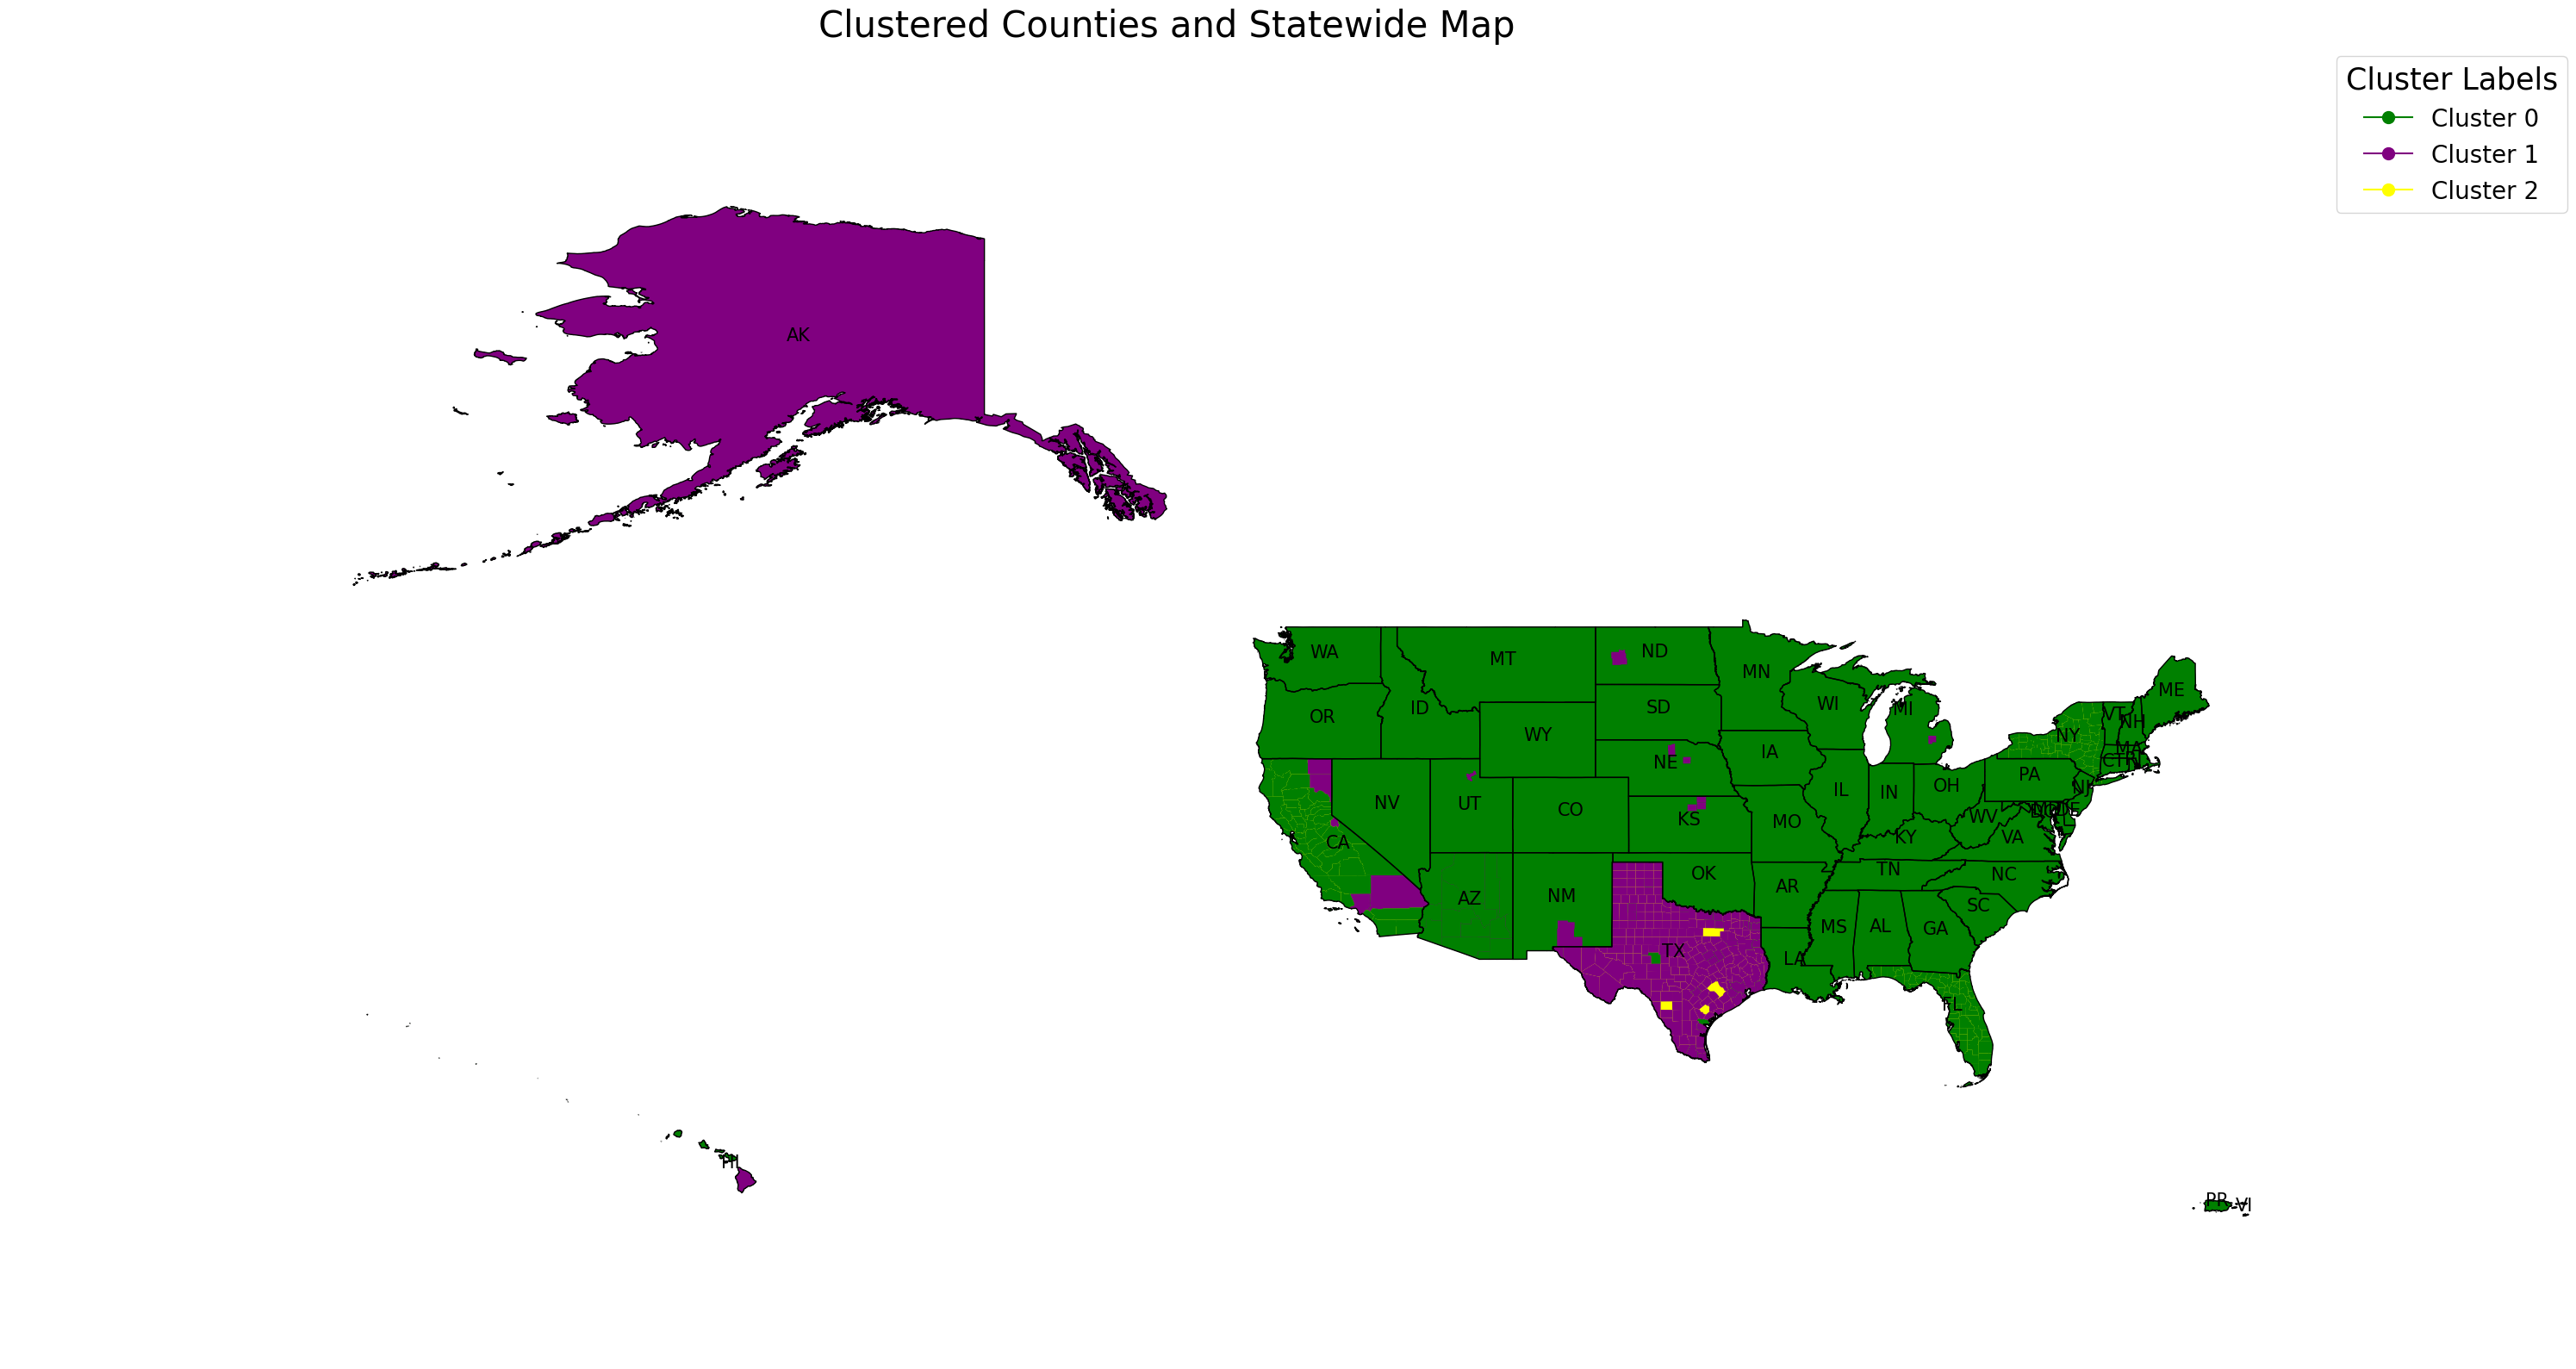

In [ ]:
norm = BoundaryNorm(range(len(np.unique(cluster_labels))+1), colormap.N)

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 50))

# Plot the counties with clusters colored according to
state_gdf_match.plot(column='k_cluster', ax=ax, cmap=colormap, norm=norm, legend=False)

matching_counties_gdf_k_cluster.plot(column='k_cluster', ax=ax, cmap=colormap, norm=norm, legend=False)

# Overlay state boundaries
state_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Annotate with state abbreviations
for idx, row in state_boundaries_gdf.iterrows():
    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code
    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):
        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=15, color='black')

# Set the bounds for the axes
ax.set_xlim((-200, -60))
ax.set_ylim((10, 80))

# Create a custom legend
legend_labels = [f'Cluster {i}' for i in cluster_colors.keys()]
legend_colors = [cluster_colors[i] for i in cluster_colors.keys()]
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
                  for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1),
          fontsize='20', title_fontsize='25')


# Set the title and turn off the axis
plt.title('Clustered Counties and Statewide Map', fontsize=30)
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
'''matching_counties_gdf_k_cluster.columns'''

'matching_counties_gdf_k_cluster.columns'

In [ ]:
'''state_gdf_match.columns'''

'state_gdf_match.columns'

In [ ]:
'''matching_counties_gdf_k_cluster.shape'''

'matching_counties_gdf_k_cluster.shape'

In [ ]:
'''state_gdf_match.shape'''

'state_gdf_match.shape'

In [ ]:
'''import geopandas as gpd

# Perform a spatial join to find intersecting regions
# Ensure that 'k_cluster' is the name of the column with cluster assignments in both GeoDataFrames
combined_gdf = gpd.sjoin(matching_counties_gdf_k_cluster, state_gdf_match, how='inner', predicate='intersects')

# Assuming 'k_cluster' contains the cluster numbers, identify overlaps
# Here we're adding a new column that will contain tuples of overlapping clusters
combined_gdf['overlapping_clusters'] = combined_gdf.apply(
    lambda row: (row['k_cluster_left'], row['k_cluster_right']), axis=1
)

# Now, extract the unique overlapping cluster pairs into a list
# We use a set to ensure each pair is only listed once
unique_overlaps = set(combined_gdf['overlapping_clusters'].tolist())

# If you need a list instead of a set
unique_overlaps_list = list(unique_overlaps)

print(unique_overlaps_list)'''

"import geopandas as gpd\n\n# Perform a spatial join to find intersecting regions\n# Ensure that 'k_cluster' is the name of the column with cluster assignments in both GeoDataFrames\ncombined_gdf = gpd.sjoin(matching_counties_gdf_k_cluster, state_gdf_match, how='inner', predicate='intersects')\n\n# Assuming 'k_cluster' contains the cluster numbers, identify overlaps\n# Here we're adding a new column that will contain tuples of overlapping clusters\ncombined_gdf['overlapping_clusters'] = combined_gdf.apply(\n    lambda row: (row['k_cluster_left'], row['k_cluster_right']), axis=1\n)\n\n# Now, extract the unique overlapping cluster pairs into a list\n# We use a set to ensure each pair is only listed once\nunique_overlaps = set(combined_gdf['overlapping_clusters'].tolist())\n\n# If you need a list instead of a set\nunique_overlaps_list = list(unique_overlaps)\n\nprint(unique_overlaps_list)"

In [ ]:
'''combined_gdf['overlapping_clusters'] = combined_gdf['overlapping_clusters'].apply(lambda x: tuple(sorted(x)))
# We use a set to ensure each pair is only listed once
unique_overlaps = set(combined_gdf['overlapping_clusters'].tolist())

# If you need a list instead of a set
unique_overlaps_list = list(unique_overlaps)

print(unique_overlaps_list)'''

"combined_gdf['overlapping_clusters'] = combined_gdf['overlapping_clusters'].apply(lambda x: tuple(sorted(x)))\n# We use a set to ensure each pair is only listed once\nunique_overlaps = set(combined_gdf['overlapping_clusters'].tolist())\n\n# If you need a list instead of a set\nunique_overlaps_list = list(unique_overlaps)\n\nprint(unique_overlaps_list)"

In [ ]:
'''combined_gdf.columns'''

'combined_gdf.columns'

In [ ]:
'''combined_gdf = combined_gdf.rename(columns={'STATEFP_left': 'STATEFP',
                                            'NAME_left': 'NAME',
                                            'STATE_left': 'STATE',
                                            'k_cluster_left': 'k_cluster',
                                            'k_cluster_colors_left': 'k_cluster_colors',
                                            })
combined_gdf = combined_gdf.drop(columns=['index_right', 'STATEFP_right', 'STATE_right',
       'NAME_right', 'k_cluster_right', 'k_cluster_colors_right'])
combined_gdf'''

"combined_gdf = combined_gdf.rename(columns={'STATEFP_left': 'STATEFP',\n                                            'NAME_left': 'NAME',\n                                            'STATE_left': 'STATE',\n                                            'k_cluster_left': 'k_cluster',\n                                            'k_cluster_colors_left': 'k_cluster_colors',\n                                            })\ncombined_gdf = combined_gdf.drop(columns=['index_right', 'STATEFP_right', 'STATE_right',\n       'NAME_right', 'k_cluster_right', 'k_cluster_colors_right'])\ncombined_gdf"

In [ ]:
'''conflict_color_map = {
    (0,): 'green', # cluster 0 only
    (1,): 'purple', # cluster 1 only
    (2,): 'yellow', # cluster 2 only
    (0, 1): 'orange', # Overlap of Clusters 0 and 1
    (0, 2): 'lightblue', # Overlap of Clusters 0 and 2
    (1, 2): 'grey', # Overlap of Clusters 1 and 2
}

default_color = 'white'
'''

SyntaxError: ignored

In [ ]:
'''import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming matching_counties_gdf_k_cluster and state_gdf_match are your GeoDataFrames
# Perform a spatial join to find overlapping regions. The 'op' parameter defines the type of spatial operation.
combined_gdf = gpd.sjoin(matching_counties_gdf_k_cluster, state_gdf_match, how='inner', predicate='intersects')

# Function to determine conflict based on cluster values
def determine_conflict(row):
    # Assuming that 'k_cluster' in both dataframes holds an integer value of the cluster
    county_cluster = row['k_cluster_left']
    state_cluster = row['k_cluster_right']
    combined_clusters = tuple(sorted({county_cluster, state_cluster}))
    return conflict_color_map.get(combined_clusters, default_color)

# Apply the conflict determination function to each row
combined_gdf['conflict_color'] = combined_gdf.apply(determine_conflict, axis=1)

# Plotting the combined GeoDataFrame
fig, ax = plt.subplots(figsize=(30, 50))

# Plot the counties with clusters colored according to 'Cluster_Color'
state_gdf_match.plot(column='k_cluster_colors', ax=ax, cmap=color_map_state, norm=norm, legend=False)
combined_gdf.plot(ax=ax, color=combined_gdf['conflict_color'], legend=False)

# Overlay state boundaries
state_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Annotate with state abbreviations
for idx, row in state_boundaries_gdf.iterrows():
    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code
    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):
        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=15, color='black')
# Customize legends
# Create legend handles for the conflict color map
legend_handles = [
    mpatches.Patch(color=color, label='Cluster {}'.format(', '.join(map(str, clusters))))
    for clusters, color in conflict_color_map.items()
]
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper left',
          bbox_to_anchor=(1, 1), fontsize='20', title_fontsize='25')

# Set the bounds for the axes
ax.set_xlim((-200, -60))
ax.set_ylim((10, 80))
plt.title('Clusters Map between Counties and States', fontsize='30')
plt.axis('off')
plt.tight_layout()

# Display the plot
plt.show()'''

**`Cluster 0`**:
- This cluster contains `4,500` samples and appears to represent cellular towers in areas that experience relatively more significant impacts from natural disasters. The towers in this cluster have a higher average duration of impact, indicating that they are affected for longer periods.
- Additionally, they have higher values for `'avg_Durability_Weight`' and '`avg_SupStruc`,' which might suggest that these towers are more robust or have better durability. The '`tower_count`' is relatively low in this cluster.

**`Cluster 1:`**
- Cluster 1 is the largest cluster, containing `48,795` samples. These towers seem to be in areas with lower disaster impact.
- They have a lower average duration of impact and lower values for '`avg_Durability_Weight`' and '`avg_SupStruc`,' which could mean that they are less durable or resilient.
- The '`tower_count`' varies but is relatively lower on average.

**`Cluster 2:`**
- Cluster 2 is the smallest cluster, with only `147` samples. These towers are in areas with relatively low disaster impact, similar to **`Cluster 1`**.
- However, what sets them apart is their notably higher '`tower_count`,' suggesting that there might be a greater concentration of cellular towers in these areas.

It seems that **`Cluster 0`** represents towers in areas
prone to severe natural disasters, while **`Cluster 1`** represents towers in less disaster-prone areas. Cluster 2 is unique in that it has more towers in areas with low disaster impact.

This analysis can suggest focusing on areas with higher potential disaster impact (**`Cluster 0`**) and make informed decisions regarding tower durability, redundancy, and disaster recovery plans. Conversely, areas in **`Cluster 1`** might need less attention in terms of disaster preparedness. The insights from **`Cluster 2`** could guide in optimizing tower distribution in less disaster-prone regions.






# DB Scan

In [ ]:
principal_components_optimal_df_dbscan = pd.DataFrame(principal_components_optimal)


In [ ]:
principal_components_optimal_df_dbscan

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,5.015521,-9.139669,0.451185,-2.492716,-0.665561,1.014297,-0.472420,-0.466345,0.252283,0.624429,...,-0.506481,-0.105972,0.350830,-0.010410,-0.023822,0.248986,0.037649,-0.112286,0.009100,0.037288
1,5.021138,-9.122629,0.425450,-2.491533,-0.634424,0.987273,-0.435003,-0.453389,0.252676,0.609833,...,-0.506975,-0.106070,0.353615,-0.009638,-0.024119,0.250251,0.037390,-0.113857,0.008925,0.038214
2,5.046337,-9.028575,0.322541,-2.468373,-0.489624,0.897422,-0.201950,-0.386810,0.253919,0.488644,...,-0.450596,-0.081606,-0.241619,-0.232717,-0.047626,-0.174643,-0.098812,-0.040554,0.063937,-0.051055
3,5.057571,-8.994494,0.271072,-2.466006,-0.427350,0.843374,-0.127118,-0.360897,0.254705,0.459452,...,-0.451583,-0.081801,-0.236051,-0.231174,-0.048221,-0.172111,-0.099330,-0.043697,0.063588,-0.049202
4,5.094112,-8.908352,0.028171,-2.478095,-0.229576,0.608398,-0.076150,-0.344470,0.273161,0.724828,...,-0.445543,-0.136699,-0.321463,-0.171980,0.008589,-0.173709,-0.043184,0.065470,0.083205,-0.074899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,-2.500203,-2.081724,-4.573828,2.426096,-1.474395,0.536227,-0.132424,2.735262,-0.306298,-0.951568,...,0.041960,0.021429,-0.002663,0.017466,-0.062858,0.019276,-0.025811,-0.097644,-0.010281,-0.153169
53438,-2.396635,-2.009589,-4.927035,2.485949,-1.303545,0.249457,-0.364464,2.573223,-0.315594,0.545848,...,0.037389,-0.057822,0.009303,0.056933,-0.024404,0.040613,0.057594,0.016772,0.014481,-0.201382
53439,-2.450169,-2.048594,-4.735318,2.466911,-1.414814,0.489936,-0.259399,2.635036,-0.280317,-0.324668,...,0.034023,-0.053846,-0.017016,0.075359,-0.020307,0.003366,0.057113,0.002413,0.013257,-0.176618
53440,-2.483377,-2.054378,-4.706871,2.458413,-1.393673,0.390173,-0.133572,2.707258,-0.310325,-0.596445,...,-0.022402,-0.078120,-0.041310,0.027189,-0.027858,-0.024456,0.028849,-0.096715,0.062809,-0.199414


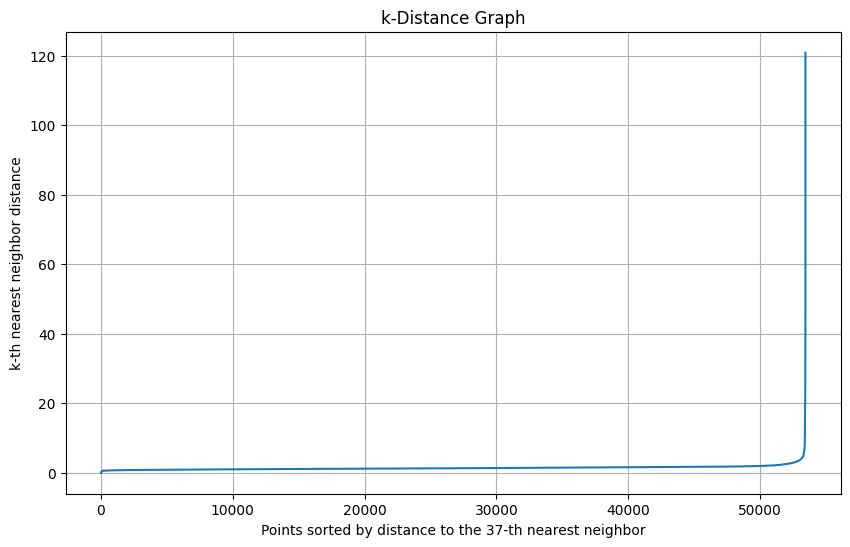

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


data = principal_components_optimal_df_dbscan.iloc[:, :-1]

k = 37

nbrs = NearestNeighbors(n_neighbors=k).fit(data)
distances, indices = nbrs.kneighbors(data)


k_dist = np.sort(distances[:, k-1])
plt.figure(figsize=(10, 6))
plt.plot(k_dist)
plt.xlabel('Points sorted by distance to the ' + str(k) + '-th nearest neighbor')
plt.ylabel('k-th nearest neighbor distance')
plt.title('k-Distance Graph')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Create dbscan model
dbscan = DBSCAN(eps=2, min_samples=37)
dbscan.fit_predict(principal_components_optimal_df_dbscan.iloc[:, :-1])
cluster_labels_dbscan = dbscan.labels_


Data points considered as "noise" are labled with -1

In [ ]:
np.unique(cluster_labels_dbscan)

array([-1,  0,  1,  2,  3,  4])

In [ ]:
len(np.unique(cluster_labels_dbscan))

6

# This graph does not include noise points

In [ ]:
# Create a DataFrame for Seaborn
plot_data = principal_components_optimal_df_dbscan.copy()
plot_data['Cluster'] = cluster_labels_dbscan
plot_data = plot_data[plot_data['Cluster'] != -1]
plot_data

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,Cluster
6,-0.673644,-0.606374,1.726815,-0.938331,-1.067585,0.849542,-1.535991,0.236050,-0.079018,0.289606,...,-0.168255,-0.321003,-0.139294,-0.133664,-0.222202,-0.157520,-0.100861,0.001734,-0.012797,0
7,-0.729826,-0.749840,1.049337,-0.587170,-1.764370,0.731011,-1.207293,-0.584212,0.082812,0.141616,...,-0.117728,-0.325144,-0.146852,-0.135173,-0.188907,-0.147655,-0.050282,-0.000029,-0.053289,0
8,-1.123883,-1.046925,1.462048,-0.282423,-0.416786,1.006554,-1.918791,0.016788,0.194852,0.083803,...,-0.129198,-0.299750,-0.172475,-0.142845,-0.214728,-0.187672,-0.073108,-0.002634,-0.033877,0
9,-0.968078,-1.346175,1.516493,0.055369,-0.408380,1.170480,-1.860115,0.939895,-1.089233,0.289456,...,0.076216,-0.135192,-0.398968,0.314532,-0.254356,-0.241892,-0.127627,0.055385,0.106307,0
10,-0.382360,-0.518343,0.825782,-0.878704,-2.673965,0.540212,-0.786161,-0.786691,0.169702,0.209628,...,-0.082612,-0.314737,-0.145461,-0.107587,-0.166621,-0.160506,-0.076344,-0.008313,-0.053466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53416,-0.620305,-0.379768,-0.491292,0.847289,0.187854,-0.875965,1.210253,-0.568451,-0.707922,-1.186693,...,-0.058138,-0.003230,0.033716,-0.073419,-0.017126,0.005893,0.009699,-0.029671,0.020846,0
53417,-0.175400,-0.248192,1.102955,2.013486,1.178867,-1.322231,1.172739,0.278673,-0.659115,0.179657,...,-0.034116,-0.144117,0.078114,-0.134118,-0.012420,0.008915,-0.063225,-0.084236,-0.037188,0
53418,0.421643,0.055598,1.265820,2.114838,0.327342,-1.606276,1.604691,0.613500,0.170159,0.501128,...,0.004888,-0.123237,0.088075,-0.099588,-0.001091,-0.031035,-0.094188,-0.108539,-0.026427,0
53419,-0.372547,-0.962416,-1.469252,1.315315,-0.202873,-0.916768,1.234224,-0.714521,-0.430600,-0.479166,...,-0.077336,-0.133037,0.100418,-0.149889,-0.058760,0.015896,-0.105473,-0.064541,-0.042204,0


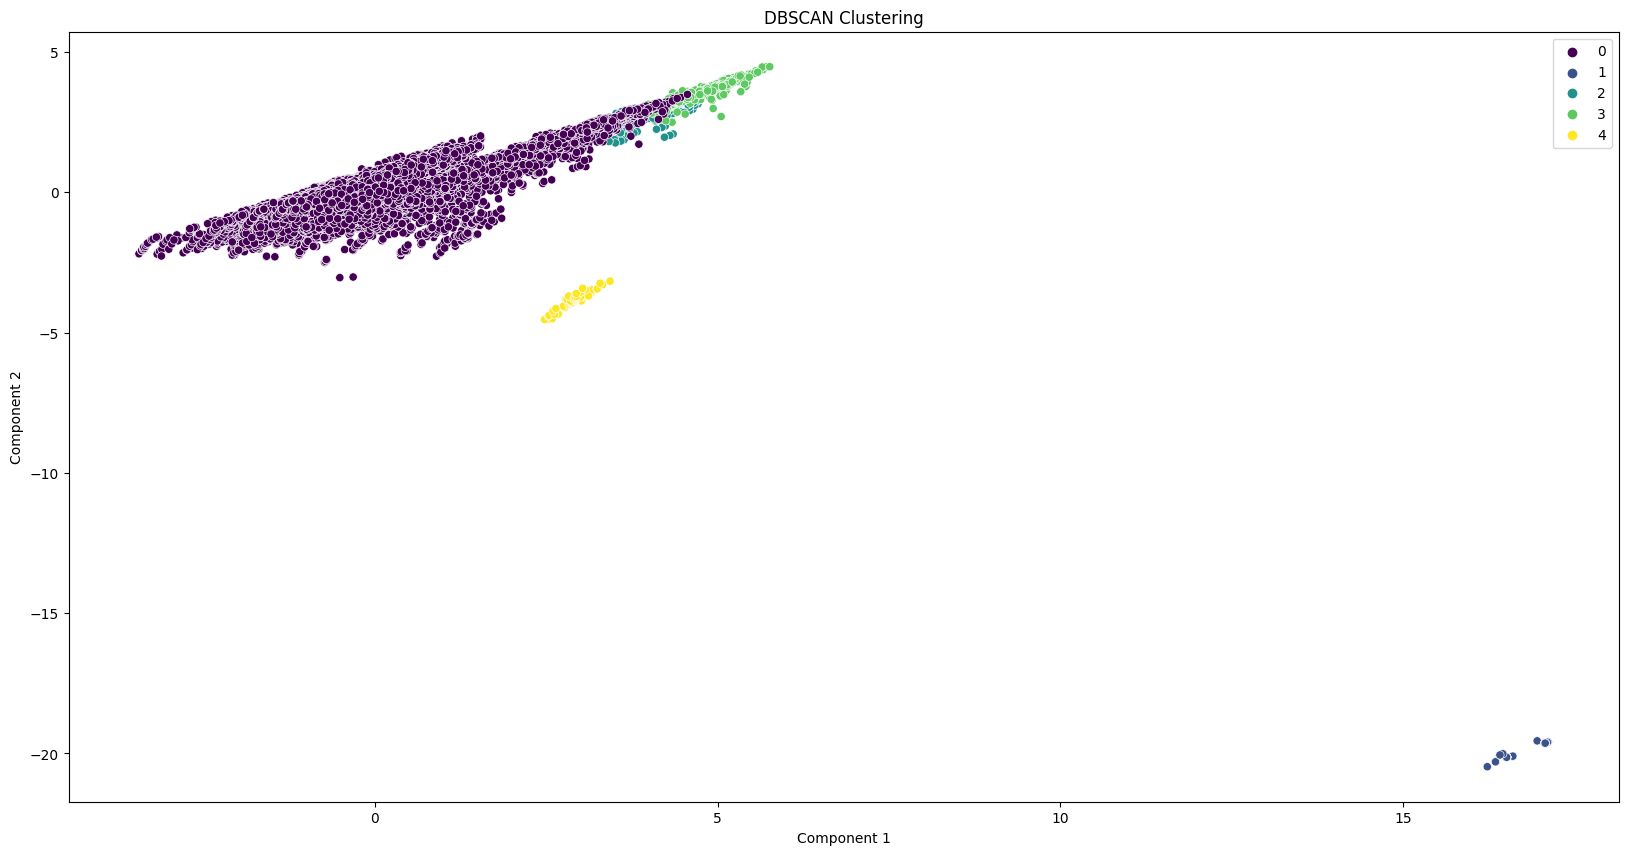

In [ ]:
# Use Seaborn to plot
'''plt.figure(figsize=(20, 10))
sns.scatterplot(data=plot_data, x=plot_data.columns[0], y=plot_data.columns[1], hue='Cluster', palette='viridis')

# Optional: if you want to include a legend
plt.title('DBSCAN Clustering')
plt.xlabel('Component 1')  # Adjust label as per your principal_components
plt.ylabel('Component 2')  # Adjust label as per your principal_components
plt.legend()

plt.show()'''

# Create a scatter plot
plt.figure(figsize=(20,10))

cluster_dbscan_no_noise = plot_data['Cluster']
# Use seaborn to add some color and style
sns.scatterplot(x=plot_data.iloc[:, 0],
                y=plot_data.iloc[:, 1],
                hue=cluster_dbscan_no_noise,
                palette='viridis',
                #legend='full'
                )


# Noise points are typically marked with a specific color (e.g., black)
# Replace -1 with your noise label if different
#noise_points = cluster_labels_dbscan == -1
#plt.scatter(principal_components_optimal_df_dbscan.iloc[noise_points, 0],
            #principal_components_optimal_df_dbscan.iloc[noise_points, 1],
            #color='red',
            #label='Noise')
plt.title('DBSCAN Clustering')
plt.xlabel('Component 1')  # Adjust label as per your principal_components
plt.ylabel('Component 2')  # Adjust label as per your principal_components
plt.legend()

plt.show()

# This graph has noise points
- Where cluster label = -1

In [ ]:
unique_dbscan = np.unique(cluster_labels_dbscan)

In [ ]:
df_dbscan = principal_components_optimal_df_dbscan.copy()
df_dbscan['cluster'] = cluster_labels_dbscan

# Now you can proceed with the analysis
for i in unique_dbscan:
    cluster = df_dbscan[df_dbscan['cluster'] == i]
    print(f"Cluster {i} contains {cluster.shape[0]} samples.")
'''
# For visualization, use the DataFrame for plotting
if df_dbscan.shape[1] > 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_dbscan.iloc[:, 0], df_dbscan.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o')
    plt.title('Clusters Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()
'''

Cluster -1 contains 1624 samples.
Cluster 0 contains 50698 samples.
Cluster 1 contains 90 samples.
Cluster 2 contains 726 samples.
Cluster 3 contains 242 samples.
Cluster 4 contains 62 samples.


"\n# For visualization, use the DataFrame for plotting\nif df_dbscan.shape[1] > 2:\n    plt.figure(figsize=(8, 6))\n    plt.scatter(df_dbscan.iloc[:, 0], df_dbscan.iloc[:, 1], c=cluster_labels, cmap='viridis', marker='o')\n    plt.title('Clusters Visualization')\n    plt.xlabel('Principal Component 1')\n    plt.ylabel('Principal Component 2')\n    plt.colorbar()\n    plt.show()\n"

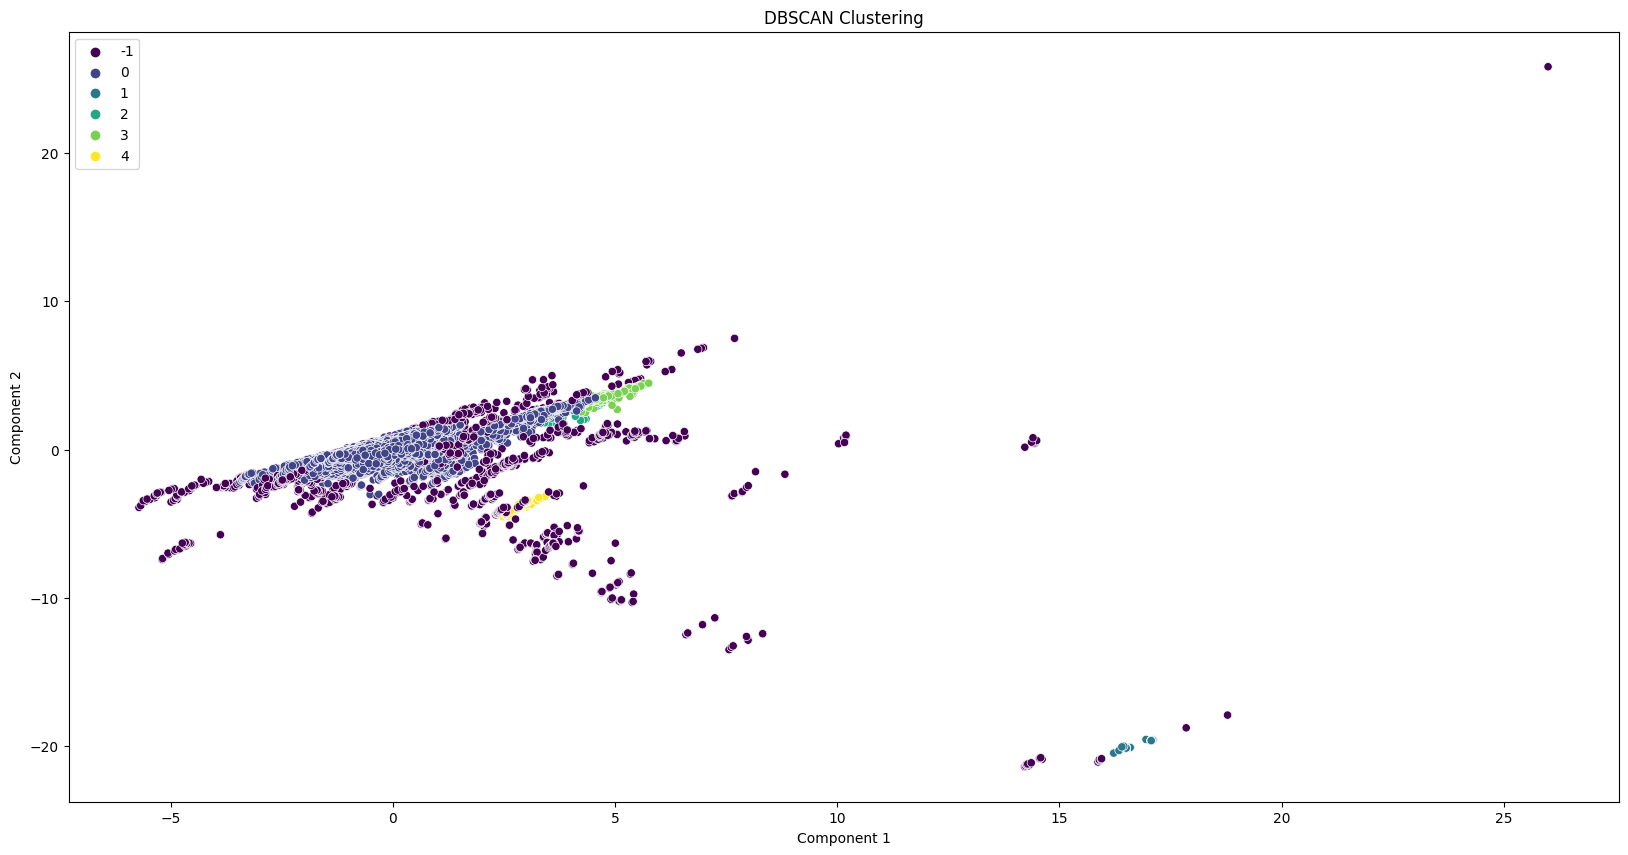

In [ ]:
# Create a scatter plot
plt.figure(figsize=(20,10))

# Use seaborn to add some color and style
sns.scatterplot(x=df_dbscan.iloc[:, 0],
                y=df_dbscan.iloc[:, 1],
                hue=cluster_labels_dbscan,
                palette='viridis',
                #legend='full'
                )


# Noise points are typically marked with a specific color (e.g., black)
# Replace -1 with your noise label if different
#noise_points = cluster_labels_dbscan == -1
#plt.scatter(principal_components_optimal_df_dbscan.iloc[noise_points, 0],
            #principal_components_optimal_df_dbscan.iloc[noise_points, 1],
            #color='red',
            #label='Noise')
plt.title('DBSCAN Clustering')
plt.xlabel('Component 1')  # Adjust label as per your principal_components
plt.ylabel('Component 2')  # Adjust label as per your principal_components
plt.legend()

plt.show()

In [ ]:
# Assuming cluster_labels_dbscan is the array of cluster labels obtained from DBSCAN
unique_clusters = np.unique(cluster_labels_dbscan)

# Count the number of clusters, excluding noise (label -1)
# num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
num_clusters = len(unique_clusters)

print("Number of clusters (excluding noise):", num_clusters)

Number of clusters (excluding noise): 6


In [ ]:
k = num_clusters  # Number of clusters
principal_components_optimal_df_dbscan['cluster'] = cluster_labels_dbscan
# Now you can proceed with the analysis
for i in unique_clusters:
    cluster_db = dataset[principal_components_optimal_df_dbscan['cluster'] == i]  # Replace 'dataset' with your DataFrame name
    print(f"Cluster {i} contains {cluster_db.shape[0]} samples.")

    # List of columns you want to analyze
    columns_to_analyze = ['year', 'duration', 'avg_Durability_Weight', 'avg_SupStruc', 'tower_count']

    # Calculate and print summary statistics for selected columns
    cluster_stats = cluster_db[columns_to_analyze].describe()
    print(cluster_stats)



Cluster -1 contains 1624 samples.
              year     duration  avg_Durability_Weight  avg_SupStruc  \
count  1624.000000  1624.000000            1624.000000   1624.000000   
mean     -0.397391     0.228720              -0.109412      0.814904   
std       1.290881     3.503324               0.823250      3.862533   
min      -3.373854    -0.564340              -2.679452     -2.108696   
25%      -1.230732    -0.564340              -0.514601     -1.209797   
50%      -0.193738    -0.441147               0.026612     -0.674724   
75%       0.566724     0.076261               0.458013      0.147438   
max       1.465452   125.510902               1.830654     19.516683   

       tower_count  
count  1624.000000  
mean      1.341198  
std       3.032567  
min      -0.157020  
25%      -0.130965  
50%       0.077477  
75%       0.390141  
max      19.723145  
Cluster 0 contains 50698 samples.
               year      duration  avg_Durability_Weight  avg_SupStruc  \
count  50698.000000 

*   **Cluster -1 (1626 samples) -**
  * ll
*   **Cluster 0 (50699 samples) - Standard Profile:**
  * Largest cluster represents standard, typically distributed cellular tower areas.
  * The mean values of each feature are close to `zero`.
  * This cluster may not require significant changes in infrastructure but could benefit from standard maintenance and disaster preparedness measures.
*    **Cluster 1 (90 samples) - High tower density:**
  * Small cluster with high tower count `(mean of 19.7)`
  * A lower mean in duration `(-0.54)` suggests that the disasters impacting these areas were of shorter duration. This could mean less severe disaster or efficient recovery processes in these regions.
  * With a significantly high tower count `(mean: 19.723145)`, this cluster suggests regions with a dense cellular network.
  * A lower durability might be a concern for future planning, indicating a need for reinforcement or modernization of infrastructure to withstand potential disasters.
  * This cluster might require targeted investment to improve the durability of the cellular infrastructure in light of potential disaster impacts.
* **Cluster 2 (726 samples) - Newer, Less Durable Towers:**
  * This cluster has a slightly lower than average tower density, with a mean tower count of `-0.090751`.
  * The positive mean in duration `(0.076261)` suggests these areas experience longer disaster durations, potentially challenging network resilience.
  * The negative mean in `avg_Durability_Weight` could indicate that while towers might be newer, their durability against prolonged disasters could be insufficient.
  * This cluster may benefit from strategies focused on enhancing tower durability and ensuring uninterrupted network service during extended disasters.
* **Cluster 3 (242 samples) - Significantly Long Disaster Durations:**
  * Marked by an extremely high mean in duration `(3.574929)`, this cluster likely faces prolonged disaster impacts.
  * Similar to `Cluster 2`, it has a slightly lower than average tower density.
  * The similarity in `avg_Durability_Weight` to `Cluster 2` suggests that these towers might also lack enhanced durability for long-duration disasters.
  * This cluster could be prioritized for upgrading infrastructure to withstand long-term disaster impacts, ensuring continuous connectivity.

* **Cluster 4 (62 samples) - Unique Structural Features:**

  * The smallest cluster, characterized by a distinctive mean in `avg_SupStruc ` `(-1.480512)`, indicating unique structural characteristics of cell towers.
  * The reasonable mean tower count `(0.1686708)` suggests an adequate level of cellular infrastructure.
  * This cluster might represent areas with specific environmental or structural challenges that require specialized cell tower designs.

The analysis reveals varied cellular infrastructure profiles across the United States. The largest group `(Cluster 0)` represents average conditions, while the other `clusters (1-4)` indicate regions with unique characteristics like high tower density, prolonged disaster durations, or special structural needs. Understanding these clusters can guide targeted infrastructure development and disaster preparedness, with special attention to clusters with unique challenges or vulnerabilities, such as `Cluster 1` and ` Cluster 3`. This approach ensures a more resilient and effective cellular network across different regions.








In [ ]:
cluster_labels_dbscan

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
principal_components_optimal_df_dbscan

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,5.015521,-9.139669,0.451185,-2.492716,-0.665561,1.014297,-0.472420,-0.466345,0.252283,0.624429,...,-0.509426,-0.105892,0.357916,-0.007929,-0.017566,0.243162,0.042929,0.107669,0.009577,0.052656
1,5.021138,-9.122629,0.425450,-2.491533,-0.634424,0.987273,-0.435003,-0.453389,0.252676,0.609833,...,-0.509890,-0.105996,0.360652,-0.007143,-0.017895,0.244489,0.042664,0.109294,0.009483,0.053626
2,5.046337,-9.028575,0.322541,-2.468373,-0.489624,0.897422,-0.201950,-0.386810,0.253919,0.488644,...,-0.452918,-0.081843,-0.235545,-0.233361,-0.043548,-0.176651,-0.098605,0.038459,0.059565,-0.049513
3,5.057571,-8.994494,0.271072,-2.466006,-0.427350,0.843374,-0.127118,-0.360897,0.254705,0.459452,...,-0.453846,-0.082051,-0.230073,-0.231790,-0.044206,-0.173996,-0.099134,0.041709,0.059378,-0.047571
4,5.094112,-8.908352,0.028171,-2.478095,-0.229576,0.608398,-0.076150,-0.344470,0.273161,0.724828,...,-0.446598,-0.137259,-0.318917,-0.172566,0.011956,-0.174246,-0.044246,-0.066095,0.077699,-0.076110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53437,-2.500203,-2.081724,-4.573828,2.426096,-1.474395,0.536227,-0.132424,2.735262,-0.306298,-0.951568,...,0.041259,0.022187,-0.003373,0.017340,-0.058544,0.014528,-0.025500,0.100073,0.002436,-0.142607
53438,-2.396635,-2.009589,-4.927035,2.485949,-1.303545,0.249457,-0.364464,2.573223,-0.315594,0.545848,...,0.037386,-0.057339,0.006719,0.057255,-0.020689,0.035947,0.056909,-0.014635,0.024965,-0.194090
53439,-2.450169,-2.048594,-4.735318,2.466911,-1.414814,0.489936,-0.259399,2.635036,-0.280317,-0.324668,...,0.034963,-0.053506,-0.021650,0.075522,-0.017573,0.000328,0.055746,0.001879,0.025625,-0.168423
53440,-2.483377,-2.054378,-4.706871,2.458413,-1.393673,0.390173,-0.133572,2.707258,-0.310325,-0.596445,...,-0.022011,-0.077686,-0.043542,0.026444,-0.025862,-0.026327,0.027852,0.097997,0.073158,-0.197733


In [ ]:
# Assuming 'data' is your original dataset and 'cluster_labels' are the labels obtained from DBSCAN
# Exclude noise points
mask = cluster_labels_dbscan != -1

filtered_labels = cluster_labels_dbscan[mask]
filtered_data = principal_components_optimal_df_dbscan[mask]

# Compute the silhouette score
if len(np.unique(filtered_labels)) > 1:  # There must be at least 2 clusters (excluding noise) to calculate the score
    score = silhouette_score(filtered_data, filtered_labels)
    print("Silhouette Score: ", score)
else:
    print("Silhouette Score cannot be calculated for a single cluster")

Silhouette Score:  0.47071680918132874


# Mapping

In [ ]:
len(cluster_labels_dbscan)

53442

In [ ]:
'''# Exclude noise points
filtered_labels = cluster_labels_dbscan[cluster_labels_dbscan != -1]'''

'# Exclude noise points\nfiltered_labels = cluster_labels_dbscan[cluster_labels_dbscan != -1]'

In [ ]:
'''# Filter out the noise points (labeled as -1)
len(filtered_labels)'''

'# Filter out the noise points (labeled as -1)\nlen(filtered_labels)'

In [ ]:
'''# Convert the cluster_labels NumPy array to a Pandas Series
cluster_series = pd.Series(filtered_labels)

# Create a list of unique cluster labels
unique_clusters_dbscan = cluster_series.unique()

# Create a colormap with a unique color for each cluster
colormap = plt.cm.get_cmap('Set1', len(unique_clusters_dbscan))

# Create a dictionary to map cluster labels to colors
cluster_colors_dbscan = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters_dbscan)}

matching_counties_gdf = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]

# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels
matching_counties_gdf['Cluster_Color_Dbscan'] = cluster_series.map(cluster_colors_dbscan)

print(matching_counties_gdf['Cluster_Color_Dbscan'].unique())
# Set the figure size
fig, ax = plt.subplots(figsize=(50, 50))  # Adjust the figsize as needed

print(unique_clusters_dbscan)

# Create a custom legend
legend_labels = [f'Cluster {cluster}' for cluster in unique_clusters_dbscan]

print('legend labels = ', legend_labels)

legend_colors = [cluster_colors_dbscan[cluster] for cluster in unique_clusters_dbscan]

print('legend colors = ', legend_colors)


# Plot the map with clusters colored
matching_counties_gdf.plot(column='Cluster_Color_Dbscan', ax=ax, legend=True)

# Display the custom legend
for label, color in zip(legend_labels, legend_colors):
    ax.plot([], [], color=color, label=label, linewidth=10)

ax.legend(title='Cluster Labels', loc='upper right', bbox_to_anchor=(1.2, 1))
fig.set_size_inches(100, 100)
plt.title('Clustered Counties Map')
plt.axis('off')
plt.show()'''



"# Convert the cluster_labels NumPy array to a Pandas Series\ncluster_series = pd.Series(filtered_labels)\n\n# Create a list of unique cluster labels\nunique_clusters_dbscan = cluster_series.unique()\n\n# Create a colormap with a unique color for each cluster\ncolormap = plt.cm.get_cmap('Set1', len(unique_clusters_dbscan))\n\n# Create a dictionary to map cluster labels to colors\ncluster_colors_dbscan = {cluster: colormap(i) for i, cluster in enumerate(unique_clusters_dbscan)}\n\nmatching_counties_gdf = us_map[us_map['NAME'].str.upper().isin(uppercase_designated_areas)]\n\n# Create a new column in your GeoDataFrame for cluster colors based on cluster_labels\nmatching_counties_gdf['Cluster_Color_Dbscan'] = cluster_series.map(cluster_colors_dbscan)\n\nprint(matching_counties_gdf['Cluster_Color_Dbscan'].unique())\n# Set the figure size\nfig, ax = plt.subplots(figsize=(50, 50))  # Adjust the figsize as needed\n\nprint(unique_clusters_dbscan)\n\n# Create a custom legend\nlegend_labels = [f'

In [ ]:
'''import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from matplotlib.colors import ListedColormap, BoundaryNorm

# ... (your code for preparing cluster_labels and matching_counties_gdf) ...

# Assuming 'Cluster_Color' is a numeric column, let's map it to colors
# Define the number of unique colors needed
num_colors = matching_counties_gdf['Cluster_Color_Dbscan'].nunique()

# Create a ListedColormap with a color for each unique value in 'Cluster_Color'
colormap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, num_colors)))

# Create a BoundaryNorm that will map the 'Cluster_Color' values to the colormap
norm = BoundaryNorm(range(num_colors+1), colormap.N)

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 20))  # This can be adjusted as needed

# Plot the map with clusters colored according to 'Cluster_Color'
# Use the colormap and norm we created
matching_counties_gdf.plot(column='Cluster_Color_Dbscan', ax=ax, cmap=colormap, norm=norm, legend=False)

# Set the bounds for the axes to focus on the contiguous US
x_lim = (-200, -60)  # These values might need adjustments
y_lim = (10, 80)  # These values might need adjustments
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Set the title and turn off the axis
plt.title('Clustered Counties Map')
plt.axis('off')

# Create a custom legend
# Get the labels and colors from the colormap
legend_labels = [f'Cluster {i}' for i in range(num_colors)]
legend_colors = [colormap(i) for i in range(num_colors)]

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
                  for label, color in zip(legend_labels, legend_colors)]

# Create and place the legend on the plot
ax.legend(handles=legend_handles, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1), fontsize='15')

# Use tight_layout to automatically adjust subplot params so that the subplot(s) fits into the figure area
plt.tight_layout()

# Show the plot with a larger size
plt.show()'''

"import matplotlib.pyplot as plt\nimport pandas as pd\nimport geopandas as gpd\nfrom matplotlib.colors import ListedColormap, BoundaryNorm\n\n# ... (your code for preparing cluster_labels and matching_counties_gdf) ...\n\n# Assuming 'Cluster_Color' is a numeric column, let's map it to colors\n# Define the number of unique colors needed\nnum_colors = matching_counties_gdf['Cluster_Color_Dbscan'].nunique()\n\n# Create a ListedColormap with a color for each unique value in 'Cluster_Color'\ncolormap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, num_colors)))\n\n# Create a BoundaryNorm that will map the 'Cluster_Color' values to the colormap\nnorm = BoundaryNorm(range(num_colors+1), colormap.N)\n\n# Set the figure size\nfig, ax = plt.subplots(figsize=(15, 20))  # This can be adjusted as needed\n\n# Plot the map with clusters colored according to 'Cluster_Color'\n# Use the colormap and norm we created\nmatching_counties_gdf.plot(column='Cluster_Color_Dbscan', ax=ax, cmap=colormap, norm=n

In [ ]:
dataset_unencoded.shape

(53442, 18)

In [ ]:
dataset_with_cluster = dataset_unencoded[['state', 'designated_area']].copy()
dataset_with_cluster['dbscan_cluster'] = cluster_labels_dbscan
dataset_with_cluster

,state,designated_area,dbscan_cluster
0,GA,STATEWIDE,-1
1,GA,STATEWIDE,-1
2,GA,STATEWIDE,-1
3,GA,STATEWIDE,-1
4,GA,STATEWIDE,-1
...,...,...,...
53437,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),-1
53438,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),-1
53439,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),-1
53440,DC,DISTRICT OF COLUMBIA (COUNTY-EQUIVALENT),-1


In [ ]:
dataset_with_cluster.drop_duplicates(inplace=True)
dataset_with_cluster.shape

(3756, 3)

In [ ]:
cluster_statewide = dataset_with_cluster[dataset_with_cluster['designated_area'] == 'STATEWIDE']
cluster_statewide

,state,designated_area,dbscan_cluster
0,GA,STATEWIDE,-1
1919,TX,STATEWIDE,-1
2162,TX,STATEWIDE,1
6401,LA,STATEWIDE,-1
8696,MI,STATEWIDE,-1
9304,MT,STATEWIDE,-1
9720,IA,STATEWIDE,-1
11362,MA,STATEWIDE,-1
11725,NH,STATEWIDE,0
12006,FL,STATEWIDE,-1


In [ ]:
dataset_with_cluster.shape

(3756, 3)

In [ ]:
dataset_with_cluster = dataset_with_cluster[dataset_with_cluster['designated_area'].isin(uppercase_designated_areas)]
dataset_with_cluster.shape

(3749, 3)

In [ ]:
dataset_with_cluster = dataset_with_cluster.rename(columns={'state': 'STATE',
                                                            'designated_area': 'NAME'})
dataset_with_cluster.columns

Index(['STATE', 'NAME', 'dbscan_cluster'], dtype='object')

Exclude the noise:

In [ ]:
# dataset_with_cluster = dataset_with_cluster[dataset_with_cluster['dbscan_cluster'] != -1]

In [ ]:
dataset_with_cluster.shape

(3749, 3)

In [ ]:
dataset_with_cluster['dbscan_cluster'] = dataset_with_cluster['dbscan_cluster'].astype(int)
dataset_with_cluster['dbscan_cluster'].dtype

dtype('int64')

In [ ]:
dataset_with_cluster['dbscan_cluster'].unique()

array([-1,  0,  1,  2,  3,  4])

In [ ]:
cluster_labels_dbscan = dataset_with_cluster['dbscan_cluster']
len(cluster_labels_dbscan)

3749

In [ ]:
us_map_copy = us_map.copy()
us_map_copy['NAME'] = us_map_copy['NAME'].str.upper()
us_map_copy['STATE'] = us_map_copy['STATEFP'].map(fips_to_state_abbrev)

In [ ]:
us_map_copy.shape

(3233, 11)

In [ ]:
matching_counties_gdf = us_map_copy.merge(dataset_with_cluster, how='inner', on=['STATE', 'NAME'])
matching_counties_gdf.shape

(3681, 12)

In [ ]:
matching_counties_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STATE,dbscan_cluster
0,21,007,00516850,0500000US21007,21007,BALLARD,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",KY,0
1,21,017,00516855,0500000US21017,21017,BOURBON,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",KY,0
2,21,031,00516862,0500000US21031,21031,BUTLER,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",KY,0
3,21,065,00516879,0500000US21065,21065,ESTILL,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",KY,0
4,21,069,00516881,0500000US21069,21069,FLEMING,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",KY,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3676,48,171,01383871,0500000US48171,48171,GILLESPIE,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",TX,0
3677,48,171,01383871,0500000US48171,48171,GILLESPIE,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",TX,2
3678,48,171,01383871,0500000US48171,48171,GILLESPIE,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",TX,3
3679,55,079,01581100,0500000US55079,55079,MILWAUKEE,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",WI,-1


In [ ]:
dataset_with_cluster['dbscan_cluster'].unique()

array([-1,  0,  1,  2,  3,  4])

In [ ]:
# matching_counties_gdf_no_noise = matching_counties_gdf.copy()

In [ ]:
# matching_counties_gdf_no_noise.shape

In [ ]:
for cluster in dataset_with_cluster['dbscan_cluster'].unique():
  print(f"Cluster: {cluster}")
  # Filter the DataFrame for the current cluster
  cluster_data = dataset_with_cluster[dataset_with_cluster['dbscan_cluster'] == cluster]

  # Get unique states in this cluster
  unique_states = cluster_data['STATE'].unique()

  for state in unique_states:
    # Get unique names for this state in the current cluster
    unique_names = cluster_data[cluster_data['STATE'] == state]['NAME'].unique()

    # Print state and its unique names
    print(f"State: {state}, Names: {', '.join(unique_names)}")

Cluster: -1
State: GA, Names: STATEWIDE, CHARLTON, CLINCH, WARE
State: TX, Names: STATEWIDE, GREGG, CAMERON, GALVESTON, HARRIS, EL PASO, CROSBY, DICKENS, ANDERSON, ANGELINA, BASTROP, BELL, BEXAR, BOWIE, BROWN, CAMP, CASS, CHEROKEE, CHILDRESS, CORYELL, COTTLE, DENTON, HARDEMAN, HARDIN, HARRISON, HOUSTON, JASPER, KING, LIBERTY, MCLENNAN, MARION, MONTGOMERY, NACOGDOCHES, NEWTON, PALO PINTO, PANOLA, PARKER, POLK, RUSK, SABINE, SAN AUGUSTINE, SAN SABA, SHELBY, SMITH, TAYLOR, TOM GREEN, TRAVIS, TRINITY, TYLER, UPSHUR, WALKER, WALLER, WICHITA, WISE, JEFF DAVIS, ARANSAS, BREWSTER, HOOD
State: LA, Names: STATEWIDE, LAFAYETTE, ST. JAMES
State: MI, Names: STATEWIDE, GENESEE
State: MT, Names: STATEWIDE
State: IA, Names: STATEWIDE, POLK, ADAMS, TAYLOR
State: MA, Names: STATEWIDE, SUFFOLK
State: FL, Names: STATEWIDE, PINELLAS
State: AK, Names: STATEWIDE, BRISTOL BAY, YUKON-KOYUKUK, KENAI PENINSULA, MATANUSKA-SUSITNA, VALDEZ-CORDOVA, NORTH SLOPE, BETHEL, DILLINGHAM, FAIRBANKS NORTH STAR, KODIAK ISLAN

**This has no cluster 1 because the cluser 1 locates only in `STATEWIDE, TX` which is not included in US map for statewide. We will go through the statewide later, or we can do the statewide map separately.**

In [ ]:
# matching_counties_gdf_no_noise['dbscan_cluster'].unique()

In [ ]:
'''cluster_labels_dbscan = matching_counties_gdf_no_noise['dbscan_cluster']
len(cluster_labels_dbscan)'''

"cluster_labels_dbscan = matching_counties_gdf_no_noise['dbscan_cluster']\nlen(cluster_labels_dbscan)"

In [ ]:
len(matching_counties_gdf['dbscan_cluster'].unique())

5

In [ ]:
matching_counties_gdf['dbscan_cluster'] = matching_counties_gdf['dbscan_cluster'].astype(int)
matching_counties_gdf['dbscan_cluster'].dtype

dtype('int64')

In [ ]:
matching_counties_gdf['dbscan_cluster'].unique()

array([ 0, -1,  4,  2,  3])

In [ ]:
temp = matching_counties_gdf.copy()

In [ ]:
matching_counties_gdf = matching_counties_gdf[~((matching_counties_gdf['dbscan_cluster'] == 0) & (matching_counties_gdf['STATE'] == 'TX'))]
matching_counties_gdf = matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] != 3]

In [ ]:
matching_counties_gdf = matching_counties_gdf.sort_values(by='dbscan_cluster', ascending=True)

In [ ]:
for cluster in sorted(matching_counties_gdf['dbscan_cluster'].unique()):
  print(f"Cluster: {cluster}")
  # Filter the DataFrame for the current cluster
  cluster_data = matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == cluster]

  # Get unique states in this cluster
  unique_states = cluster_data['STATE'].unique()

  for state in unique_states:
    # Get unique names for this state in the current cluster
    unique_names = cluster_data[cluster_data['STATE'] == state]['NAME'].unique()

    # Print state and its unique names
    print(f"State: {state}, Names: {', '.join(unique_names)}")

Cluster: -1
State: AK, Names: NOME, FAIRBANKS NORTH STAR, BETHEL, PETERSBURG, HAINES, MATANUSKA-SUSITNA, YUKON-KOYUKUK, DILLINGHAM, JUNEAU, KODIAK ISLAND, VALDEZ-CORDOVA, ANCHORAGE, BRISTOL BAY, DENALI, NORTHWEST ARCTIC, SKAGWAY, ALEUTIANS EAST, NORTH SLOPE, KENAI PENINSULA, LAKE AND PENINSULA
State: CA, Names: ALPINE, LAKE, LOS ANGELES, ORANGE, SAN DIEGO, SANTA BARBARA, SONOMA, INYO, LASSEN, SAN FRANCISCO, IMPERIAL, VENTURA, MODOC, SANTA CRUZ, SAN BERNARDINO, RIVERSIDE
State: NJ, Names: BERGEN, ESSEX, PASSAIC, UNION
State: NY, Names: KINGS, QUEENS, NASSAU, NEW YORK, RICHMOND, BRONX
State: OH, Names: CUYAHOGA
State: TX, Names: EL PASO, GALVESTON, HARDIN, JASPER, NACOGDOCHES, SMITH, TYLER, WALKER, ARANSAS, SAN SABA, TRAVIS, TRINITY, WALLER, ANDERSON, ANGELINA, BEXAR, BOWIE, BREWSTER, CASS, HOUSTON, MARION, MONTGOMERY, POLK, SAN AUGUSTINE, HARRISON, NEWTON, SHELBY, CAMERON, RUSK, UPSHUR, MCLENNAN, TAYLOR, TOM GREEN, WICHITA, BROWN, CROSBY, WISE, PANOLA, SABINE, PARKER, HOOD, GREGG, BASTR

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from matplotlib.colors import ListedColormap, BoundaryNorm

# Convert the cluster_labels NumPy array to a Pandas Series
cluster_labels_series_dbscan = pd.Series(cluster_labels_dbscan)

# Create a list of unique cluster labels
unique_clusters_dbscan = cluster_labels_series_dbscan.unique()
unique_clusters_dbscan = unique_clusters_dbscan[unique_clusters_dbscan != 3]

# Create a colormap with a unique color for each cluster
# colormap_dbscan = ListedColormap(['purple', 'pink', 'yellow', 'green', 'orange', 'lightblue'])
viridis = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters_dbscan)))
colors = viridis.tolist()
colors[0] = [0.5019607843137255, 0.0, 0.5019607843137255, 1.0]
'''colors[1] = [1.0, 0.6470588235294118, 0.0, 1.0]
colors[2] = [1.0, 0.7529411764705882, 0.796078431372549, 1.0]'''
colormap_dbscan = ListedColormap(colors)
# Create a dictionary to map cluster labels to colors
cluster_colors_dbscan = {cluster: colormap_dbscan(i) for i, cluster in enumerate(unique_clusters_dbscan)}

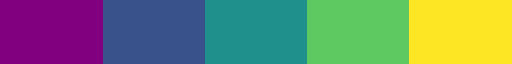

In [ ]:
colormap_dbscan

In [ ]:
cluster_colors_dbscan

{-1: (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 0: (0.229739, 0.322361, 0.545706, 1.0),
 1: (0.127568, 0.566949, 0.550556, 1.0),
 2: (0.369214, 0.788888, 0.382914, 1.0),
 4: (0.993248, 0.906157, 0.143936, 1.0)}

In [ ]:
'''num_colors_dbscan = matching_counties_gdf['dbscan_cluster'].nunique()
num_colors_dbscan'''

"num_colors_dbscan = matching_counties_gdf['dbscan_cluster'].nunique()\nnum_colors_dbscan"

In [ ]:
matching_counties_gdf['dbscan_cluster_colors'] = matching_counties_gdf['dbscan_cluster'].map(cluster_colors_dbscan)
matching_counties_gdf

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STATE,dbscan_cluster,dbscan_cluster_colors
0,21,007,00516850,0500000US21007,21007,BALLARD,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",KY,0,"(0.229739, 0.322361, 0.545706, 1.0)"
1,21,017,00516855,0500000US21017,21017,BOURBON,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",KY,0,"(0.229739, 0.322361, 0.545706, 1.0)"
2,21,031,00516862,0500000US21031,21031,BUTLER,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",KY,0,"(0.229739, 0.322361, 0.545706, 1.0)"
3,21,065,00516879,0500000US21065,21065,ESTILL,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",KY,0,"(0.229739, 0.322361, 0.545706, 1.0)"
4,21,069,00516881,0500000US21069,21069,FLEMING,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",KY,0,"(0.229739, 0.322361, 0.545706, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,31,073,00835858,0500000US31073,31073,GOSPER,06,1186616237,11831826,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",NE,0,"(0.229739, 0.322361, 0.545706, 1.0)"
3675,39,075,01074050,0500000US39075,39075,HOLMES,06,1094405866,3695230,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",OH,0,"(0.229739, 0.322361, 0.545706, 1.0)"
3677,48,171,01383871,0500000US48171,48171,GILLESPIE,06,2740719114,9012764,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
3679,55,079,01581100,0500000US55079,55079,MILWAUKEE,06,625440563,2455383635,"POLYGON ((-88.06959 42.86726, -88.06959 42.872...",WI,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."


In [ ]:
cluster_statewide['dbscan_cluster'].unique()

array([-1,  1,  0])

In [ ]:
'''cluster_statewide = cluster_statewide[cluster_statewide['dbscan_cluster'] != -1]
cluster_statewide['dbscan_cluster'].unique()'''

"cluster_statewide = cluster_statewide[cluster_statewide['dbscan_cluster'] != -1]\ncluster_statewide['dbscan_cluster'].unique()"

In [ ]:
states_gdf_db = us_map.dissolve(by='STATEFP')
states_gdf_db.reset_index(inplace=True)
states_gdf_db['STATE'] = states_gdf_db['STATEFP'].map(fips_to_state_abbrev)

In [ ]:
cluster_statewide = cluster_statewide.rename(columns={'state': 'STATE', 'designated_area': 'NAME'})
cluster_statewide.columns

Index(['STATE', 'NAME', 'dbscan_cluster'], dtype='object')

In [ ]:
state_gdf_match_db = states_gdf_db.merge(cluster_statewide, on='STATE', how='left')
state_gdf_match_db.isnull().sum()

STATEFP           0
geometry          0
COUNTYFP          0
COUNTYNS          0
AFFGEOID          0
GEOID             0
NAME_x            0
LSAD              0
ALAND             0
AWATER            0
STATE             0
NAME_y            1
dbscan_cluster    1
dtype: int64

In [ ]:
state_gdf_match_db.dropna(inplace=True)
state_gdf_match_db.isnull().sum()

STATEFP           0
geometry          0
COUNTYFP          0
COUNTYNS          0
AFFGEOID          0
GEOID             0
NAME_x            0
LSAD              0
ALAND             0
AWATER            0
STATE             0
NAME_y            0
dbscan_cluster    0
dtype: int64

In [ ]:
state_gdf_match_db['dbscan_cluster'].unique()

array([-1.,  0.,  1.])

In [ ]:
state_gdf_match_db['dbscan_cluster'] = state_gdf_match_db['dbscan_cluster'].astype(int)
state_gdf_match_db['dbscan_cluster'].dtype

dtype('int64')

In [ ]:
statewide_cluster_labels_db = state_gdf_match_db['dbscan_cluster'].unique()
statewide_cluster_labels_db

array([-1,  0,  1])

In [ ]:
# color_map_state_only = ListedColormap(['purple', 'yellow'])
cluster_colors_statewide_only = {cluster: colormap_dbscan(i) for i, cluster in enumerate(statewide_cluster_labels_db)}

In [ ]:
cluster_colors_statewide_only

{-1: (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 0: (0.229739, 0.322361, 0.545706, 1.0),
 1: (0.127568, 0.566949, 0.550556, 1.0)}

In [ ]:
cluster_colors_dbscan

{-1: (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 0: (0.229739, 0.322361, 0.545706, 1.0),
 1: (0.127568, 0.566949, 0.550556, 1.0),
 2: (0.369214, 0.788888, 0.382914, 1.0),
 4: (0.993248, 0.906157, 0.143936, 1.0)}

In [ ]:
statewide_cluster_labels_db

array([-1,  0,  1])

In [ ]:
state_gdf_match_db['db_cluster_colors'] = state_gdf_match_db['dbscan_cluster'].map(cluster_colors_statewide_only)
state_gdf_match_db


,STATEFP,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,STATE,NAME_y,dbscan_cluster,db_cluster_colors
0,01,"MULTIPOLYGON (((-88.22462 30.24556, -88.20147 ...",001,00161526,0500000US01001,01001,Autauga,06,1539602123,25706961,AL,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
1,02,"MULTIPOLYGON (((-179.13001 51.29042, -179.1282...",016,01419965,0500000US02016,02016,Aleutians West,05,11375510886,25186009907,AK,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
2,04,"POLYGON ((-111.45108 31.45320, -111.56019 31.4...",005,00025443,0500000US04005,04005,Coconino,06,48222143094,110123852,AZ,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
3,05,"POLYGON ((-93.07069 33.01779, -93.07317 33.017...",011,00063757,0500000US05011,05011,Bradley,06,1681514472,9532926,AR,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
4,06,"MULTIPOLYGON (((-122.50202 37.59928, -122.5013...",001,01675839,0500000US06001,06001,Alameda,06,1909598013,216923745,CA,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
5,08,"POLYGON ((-105.99747 36.99542, -106.00632 36.9...",013,00198122,0500000US08013,08013,Boulder,06,1881290197,36512644,CO,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
6,09,"MULTIPOLYGON (((-73.62272 40.98456, -73.62186 ...",009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242,CT,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
7,10,"MULTIPOLYGON (((-75.31154 38.94463, -75.31591 ...",005,00217269,0500000US10005,10005,Sussex,06,2424543661,674175861,DE,STATEWIDE,0,"(0.229739, 0.322361, 0.545706, 1.0)"
8,11,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",001,01702382,0500000US11001,11001,District of Columbia,00,158340391,18687198,DC,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
9,12,"MULTIPOLYGON (((-82.86414 24.62473, -82.86439 ...",009,00295749,0500000US12009,12009,Brevard,06,2629306677,1403367455,FL,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."


In [ ]:
state_gdf_match_db[state_gdf_match_db['dbscan_cluster'] == 1]['STATE'].unique()

array(['TX'], dtype=object)

In [ ]:
num_colors_state_db = state_gdf_match_db['dbscan_cluster'].nunique()
num_colors_state_db


3

In [ ]:
state_boundaries_gdf = us_map.dissolve(by='STATEFP')

In [ ]:
num_colors_dbscan = len(cluster_colors_dbscan)
num_colors_dbscan

5

In [ ]:
state_gdf_match_db['dbscan_cluster'].unique()

array([-1,  0,  1])

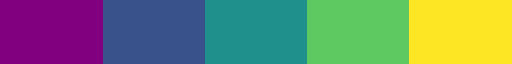

In [ ]:
colormap_dbscan

In [ ]:
state_gdf_match_db.columns

Index(['STATEFP', 'geometry', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID',
       'NAME_x', 'LSAD', 'ALAND', 'AWATER', 'STATE', 'NAME_y',
       'dbscan_cluster', 'db_cluster_colors'],
      dtype='object')

In [ ]:
matching_counties_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'STATE', 'dbscan_cluster',
       'dbscan_cluster_colors'],
      dtype='object')

In [ ]:
matching_counties_gdf = matching_counties_gdf.rename(columns={'dbscan_cluster_colors': 'db_cluster_colors'})
matching_counties_gdf.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'STATE', 'dbscan_cluster',
       'db_cluster_colors'],
      dtype='object')

In [ ]:
print(f'state_gdf_match_db: {state_gdf_match_db.shape}')
print(f'matching_counties_gdf: {matching_counties_gdf.shape}')

state_gdf_match_db: (57, 14)
matching_counties_gdf: (3197, 13)


In [ ]:
common_columns = ['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID',
                  'LSAD', 'ALAND', 'AWATER', 'geometry', 'STATE', 'dbscan_cluster',
                  'db_cluster_colors']
state_gdf_match_db_filter = state_gdf_match_db[common_columns]
matching_counties_gdf_filter = matching_counties_gdf[common_columns]
print(f'state_gdf_match_db: {state_gdf_match_db_filter.shape}')
print(f'matching_counties_gdf: {matching_counties_gdf_filter.shape}')

state_gdf_match_db: (57, 12)
matching_counties_gdf: (3197, 12)


In [ ]:
plotting_dbscan = pd.concat([state_gdf_match_db_filter, matching_counties_gdf_filter]).reset_index()
print(f'plotting_dbscan: {plotting_dbscan.shape}')

plotting_dbscan: (3254, 13)


In [ ]:
plotting_dbscan.columns

Index(['index', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'STATE', 'dbscan_cluster',
       'db_cluster_colors'],
      dtype='object')

In [ ]:
plotting_dbscan = plotting_dbscan.sort_values(by='STATEFP', ascending=True)
plotting_dbscan

,index,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,LSAD,ALAND,AWATER,geometry,STATE,dbscan_cluster,db_cluster_colors
0,0,01,001,00161526,0500000US01001,01001,06,1539602123,25706961,"MULTIPOLYGON (((-88.22462 30.24556, -88.20147 ...",AL,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
2132,2359,01,083,00161567,0500000US01083,01083,06,1450277885,122329729,"POLYGON ((-87.27848 34.77765, -87.27805 34.778...",AL,0,"(0.229739, 0.322361, 0.545706, 1.0)"
2131,2358,01,077,00161564,0500000US01077,01077,06,1730146083,133608930,"POLYGON ((-88.20296 35.00803, -88.00003 35.005...",AL,0,"(0.229739, 0.322361, 0.545706, 1.0)"
801,822,01,043,00161547,0500000US01043,01043,06,1903073019,52422496,"POLYGON ((-87.15104 33.99322, -87.11199 33.992...",AL,0,"(0.229739, 0.322361, 0.545706, 1.0)"
805,826,01,033,00161542,0500000US01033,01033,06,1535202321,79700277,"POLYGON ((-88.13925 34.58779, -88.13872 34.589...",AL,0,"(0.229739, 0.322361, 0.545706, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,1266,78,030,02378250,0500000US78030,78030,10,81108425,717921377,"MULTIPOLYGON (((-64.82966 18.30006, -64.82921 ...",VI,0,"(0.229739, 0.322361, 0.545706, 1.0)"
56,57,78,010,02378248,0500000US78010,78010,10,215914992,645644844,"MULTIPOLYGON (((-65.00166 18.30650, -65.00167 ...",VI,0,"(0.229739, 0.322361, 0.545706, 1.0)"
394,399,78,010,02378248,0500000US78010,78010,10,215914992,645644844,"MULTIPOLYGON (((-64.62799 17.78933, -64.62717 ...",VI,0,"(0.229739, 0.322361, 0.545706, 1.0)"
395,400,78,020,02378249,0500000US78020,78020,10,50998479,186669980,"MULTIPOLYGON (((-64.79839 18.33127, -64.79839 ...",VI,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."


In [ ]:
state_gdf_match_db[state_gdf_match_db['STATE'] == 'PR']

,STATEFP,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,STATE,NAME_y,dbscan_cluster,db_cluster_colors
55,72,"MULTIPOLYGON (((-66.86305 17.94697, -66.86305 ...",054,01804507,0500000US72054,72054,Florida,13,39391499,34012,PR,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
56,72,"MULTIPOLYGON (((-66.86305 17.94697, -66.86305 ...",054,01804507,0500000US72054,72054,Florida,13,39391499,34012,PR,STATEWIDE,0,"(0.229739, 0.322361, 0.545706, 1.0)"


In [ ]:
state_gdf_match_db[state_gdf_match_db['STATE'] == 'TX']

,STATEFP,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,STATE,NAME_y,dbscan_cluster,db_cluster_colors
43,48,"MULTIPOLYGON (((-100.80205 29.24995, -100.8079...",011,01383791,0500000US48011,48011,Armstrong,06,2354581675,12219583,TX,STATEWIDE,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
44,48,"MULTIPOLYGON (((-100.80205 29.24995, -100.8079...",011,01383791,0500000US48011,48011,Armstrong,06,2354581675,12219583,TX,STATEWIDE,1,"(0.127568, 0.566949, 0.550556, 1.0)"


In [ ]:
state_gdf_match_db = state_gdf_match_db[~((state_gdf_match_db['STATE'] == 'TX') & (state_gdf_match_db['dbscan_cluster'] == -1))]
state_gdf_match_db = state_gdf_match_db[~((state_gdf_match_db['STATE'] == 'PR') & (state_gdf_match_db['dbscan_cluster'] == -1))]


In [ ]:
state_gdf_match_db[state_gdf_match_db['STATE'] == 'PR']

,STATEFP,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,STATE,NAME_y,dbscan_cluster,db_cluster_colors
56,72,"MULTIPOLYGON (((-66.86305 17.94697, -66.86305 ...",054,01804507,0500000US72054,72054,Florida,13,39391499,34012,PR,STATEWIDE,0,"(0.229739, 0.322361, 0.545706, 1.0)"


In [ ]:
state_gdf_match_db[state_gdf_match_db['STATE'] == 'TX']

,STATEFP,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,STATE,NAME_y,dbscan_cluster,db_cluster_colors
44,48,"MULTIPOLYGON (((-100.80205 29.24995, -100.8079...",011,01383791,0500000US48011,48011,Armstrong,06,2354581675,12219583,TX,STATEWIDE,1,"(0.127568, 0.566949, 0.550556, 1.0)"


In [ ]:
# matching_counties_gdf = matching_counties_gdf.sort_values(by='dbscan_cluster', ascending=True)


In [ ]:
matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == 2]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STATE,dbscan_cluster,db_cluster_colors
1739,48,049,01383810,0500000US48049,48049,BROWN,06,2446120250,32375524,"POLYGON ((-99.20341 31.75822, -99.20232 31.814...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
116,48,083,01383827,0500000US48083,48083,COLEMAN,06,3270933224,47963343,"POLYGON ((-99.72240 31.57608, -99.72170 31.576...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
113,48,055,01383813,0500000US48055,48055,CALDWELL,06,1412150551,4973307,"POLYGON ((-97.89707 29.86437, -97.89615 29.870...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
104,48,025,01383798,0500000US48025,48025,BEE,06,2279809496,246409,"POLYGON ((-98.08976 28.66298, -98.00525 28.690...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
110,48,053,01383812,0500000US48053,48053,BURNET,06,2575134223,69922923,"POLYGON ((-98.45924 31.01038, -98.45874 31.011...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,48,283,01383924,0500000US48283,48283,LA SALLE,06,3850545736,19503739,"POLYGON ((-99.39594 28.50026, -99.39609 28.592...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
3169,48,099,01383835,0500000US48099,48099,CORYELL,06,2725181907,11798688,"POLYGON ((-98.15543 31.47629, -98.15528 31.476...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
1419,48,389,01383980,0500000US48389,48389,REEVES,06,6825534331,17396672,"POLYGON ((-104.10103 31.12474, -104.10033 31.1...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
2141,48,435,01384003,0500000US48435,48435,SUTTON,06,3765674778,1277066,"POLYGON ((-100.96075 30.50235, -100.96059 30.7...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"


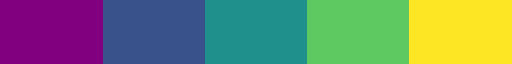

In [ ]:
colormap_dbscan

In [ ]:
state_boundaries_gdf.reset_index()

,STATEFP,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,01,"MULTIPOLYGON (((-88.22462 30.24556, -88.20147 ...",001,00161526,0500000US01001,01001,Autauga,06,1539602123,25706961
1,02,"MULTIPOLYGON (((-179.13001 51.29042, -179.1282...",016,01419965,0500000US02016,02016,Aleutians West,05,11375510886,25186009907
2,04,"POLYGON ((-111.45108 31.45320, -111.56019 31.4...",005,00025443,0500000US04005,04005,Coconino,06,48222143094,110123852
3,05,"POLYGON ((-93.07069 33.01779, -93.07317 33.017...",011,00063757,0500000US05011,05011,Bradley,06,1681514472,9532926
4,06,"MULTIPOLYGON (((-122.50202 37.59928, -122.5013...",001,01675839,0500000US06001,06001,Alameda,06,1909598013,216923745
5,08,"POLYGON ((-105.99747 36.99542, -106.00632 36.9...",013,00198122,0500000US08013,08013,Boulder,06,1881290197,36512644
6,09,"MULTIPOLYGON (((-73.62272 40.98456, -73.62186 ...",009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242
7,10,"MULTIPOLYGON (((-75.31154 38.94463, -75.31591 ...",005,00217269,0500000US10005,10005,Sussex,06,2424543661,674175861
8,11,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",001,01702382,0500000US11001,11001,District of Columbia,00,158340391,18687198
9,12,"MULTIPOLYGON (((-82.86414 24.62473, -82.86439 ...",009,00295749,0500000US12009,12009,Brevard,06,2629306677,1403367455


In [ ]:
cluster_colors_dbscan

{-1: (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 0: (0.229739, 0.322361, 0.545706, 1.0),
 1: (0.127568, 0.566949, 0.550556, 1.0),
 2: (0.369214, 0.788888, 0.382914, 1.0),
 4: (0.993248, 0.906157, 0.143936, 1.0)}

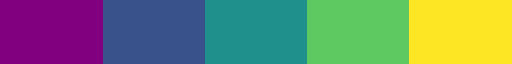

In [ ]:
colormap_dbscan

In [ ]:
colormap_dbscan.N

5

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,STATE,dbscan_cluster,db_cluster_colors
2550,48,021,01383796,0500000US48021,48021,BASTROP,06,2300370292,19079348,"POLYGON ((-97.63921 30.07829, -97.63365 30.083...",TX,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
1437,48,401,01383986,0500000US48401,48401,RUSK,06,2393244484,37217198,"POLYGON ((-94.98596 32.36402, -94.98541 32.370...",TX,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
1094,36,059,00974128,0500000US36059,36059,NASSAU,06,737085188,437386635,"MULTIPOLYGON (((-73.49097 40.91947, -73.48960 ...",NY,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
1441,48,459,01384015,0500000US48459,48459,UPSHUR,06,1509910100,24878888,"POLYGON ((-95.15288 32.62559, -95.15274 32.660...",TX,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
2822,48,121,01383847,0500000US48121,48121,DENTON,06,2275564887,192448040,"POLYGON ((-97.39826 32.99996, -97.39792 33.013...",TX,-1,"(0.5019607843137255, 0.0, 0.5019607843137255, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,48,099,01383835,0500000US48099,48099,CORYELL,06,2725181907,11798688,"POLYGON ((-98.15543 31.47629, -98.15528 31.476...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
1419,48,389,01383980,0500000US48389,48389,REEVES,06,6825534331,17396672,"POLYGON ((-104.10103 31.12474, -104.10033 31.1...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
2141,48,435,01384003,0500000US48435,48435,SUTTON,06,3765674778,1277066,"POLYGON ((-100.96075 30.50235, -100.96059 30.7...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"
1805,48,279,01383926,0500000US48279,48279,LAMB,06,2631897582,3973764,"POLYGON ((-102.61559 33.91147, -102.61530 34.1...",TX,2,"(0.369214, 0.788888, 0.382914, 1.0)"


In [ ]:
matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == 'TX']

,STATEFP,geometry,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME_x,LSAD,ALAND,AWATER,STATE,NAME_y,dbscan_cluster,db_cluster_colors
44,48,"MULTIPOLYGON (((-100.80205 29.24995, -100.8079...",011,01383791,0500000US48011,48011,Armstrong,06,2354581675,12219583,TX,STATEWIDE,1,"(0.127568, 0.566949, 0.550556, 1.0)"


In [ ]:
num_colors_dbscan

5

In [ ]:
cluster_colors_dbscan

{-1: (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 0: (0.229739, 0.322361, 0.545706, 1.0),
 1: (0.127568, 0.566949, 0.550556, 1.0),
 2: (0.369214, 0.788888, 0.382914, 1.0),
 4: (0.993248, 0.906157, 0.143936, 1.0)}

In [ ]:
cluster_neg_1 = matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == -1]
cluster_0 = matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == 0]
cluster_1 = matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == 1]
cluster_2 = matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == 2]
cluster_4 = matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == 4]

In [ ]:
state_cluster_neg_1 = state_gdf_match_db[state_gdf_match_db['dbscan_cluster'] == -1]
state_cluster_0 = state_gdf_match_db[state_gdf_match_db['dbscan_cluster'] == 0]
state_cluster_1 = state_gdf_match_db[state_gdf_match_db['dbscan_cluster'] == 1]
state_cluster_2 = state_gdf_match_db[state_gdf_match_db['dbscan_cluster'] == 2]
state_cluster_4 = state_gdf_match_db[state_gdf_match_db['dbscan_cluster'] == 4]

In [ ]:
print(f'-1: {state_cluster_neg_1.shape}')
print(f'0: {state_cluster_0.shape}')
print(f'1: {state_cluster_1.shape}')
print(f'2: {state_cluster_2.shape}')
print(f'4: {state_cluster_4.shape}')

-1: (45, 14)
0: (9, 14)
1: (1, 14)
2: (0, 14)
4: (0, 14)


### DB scan Map

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: On

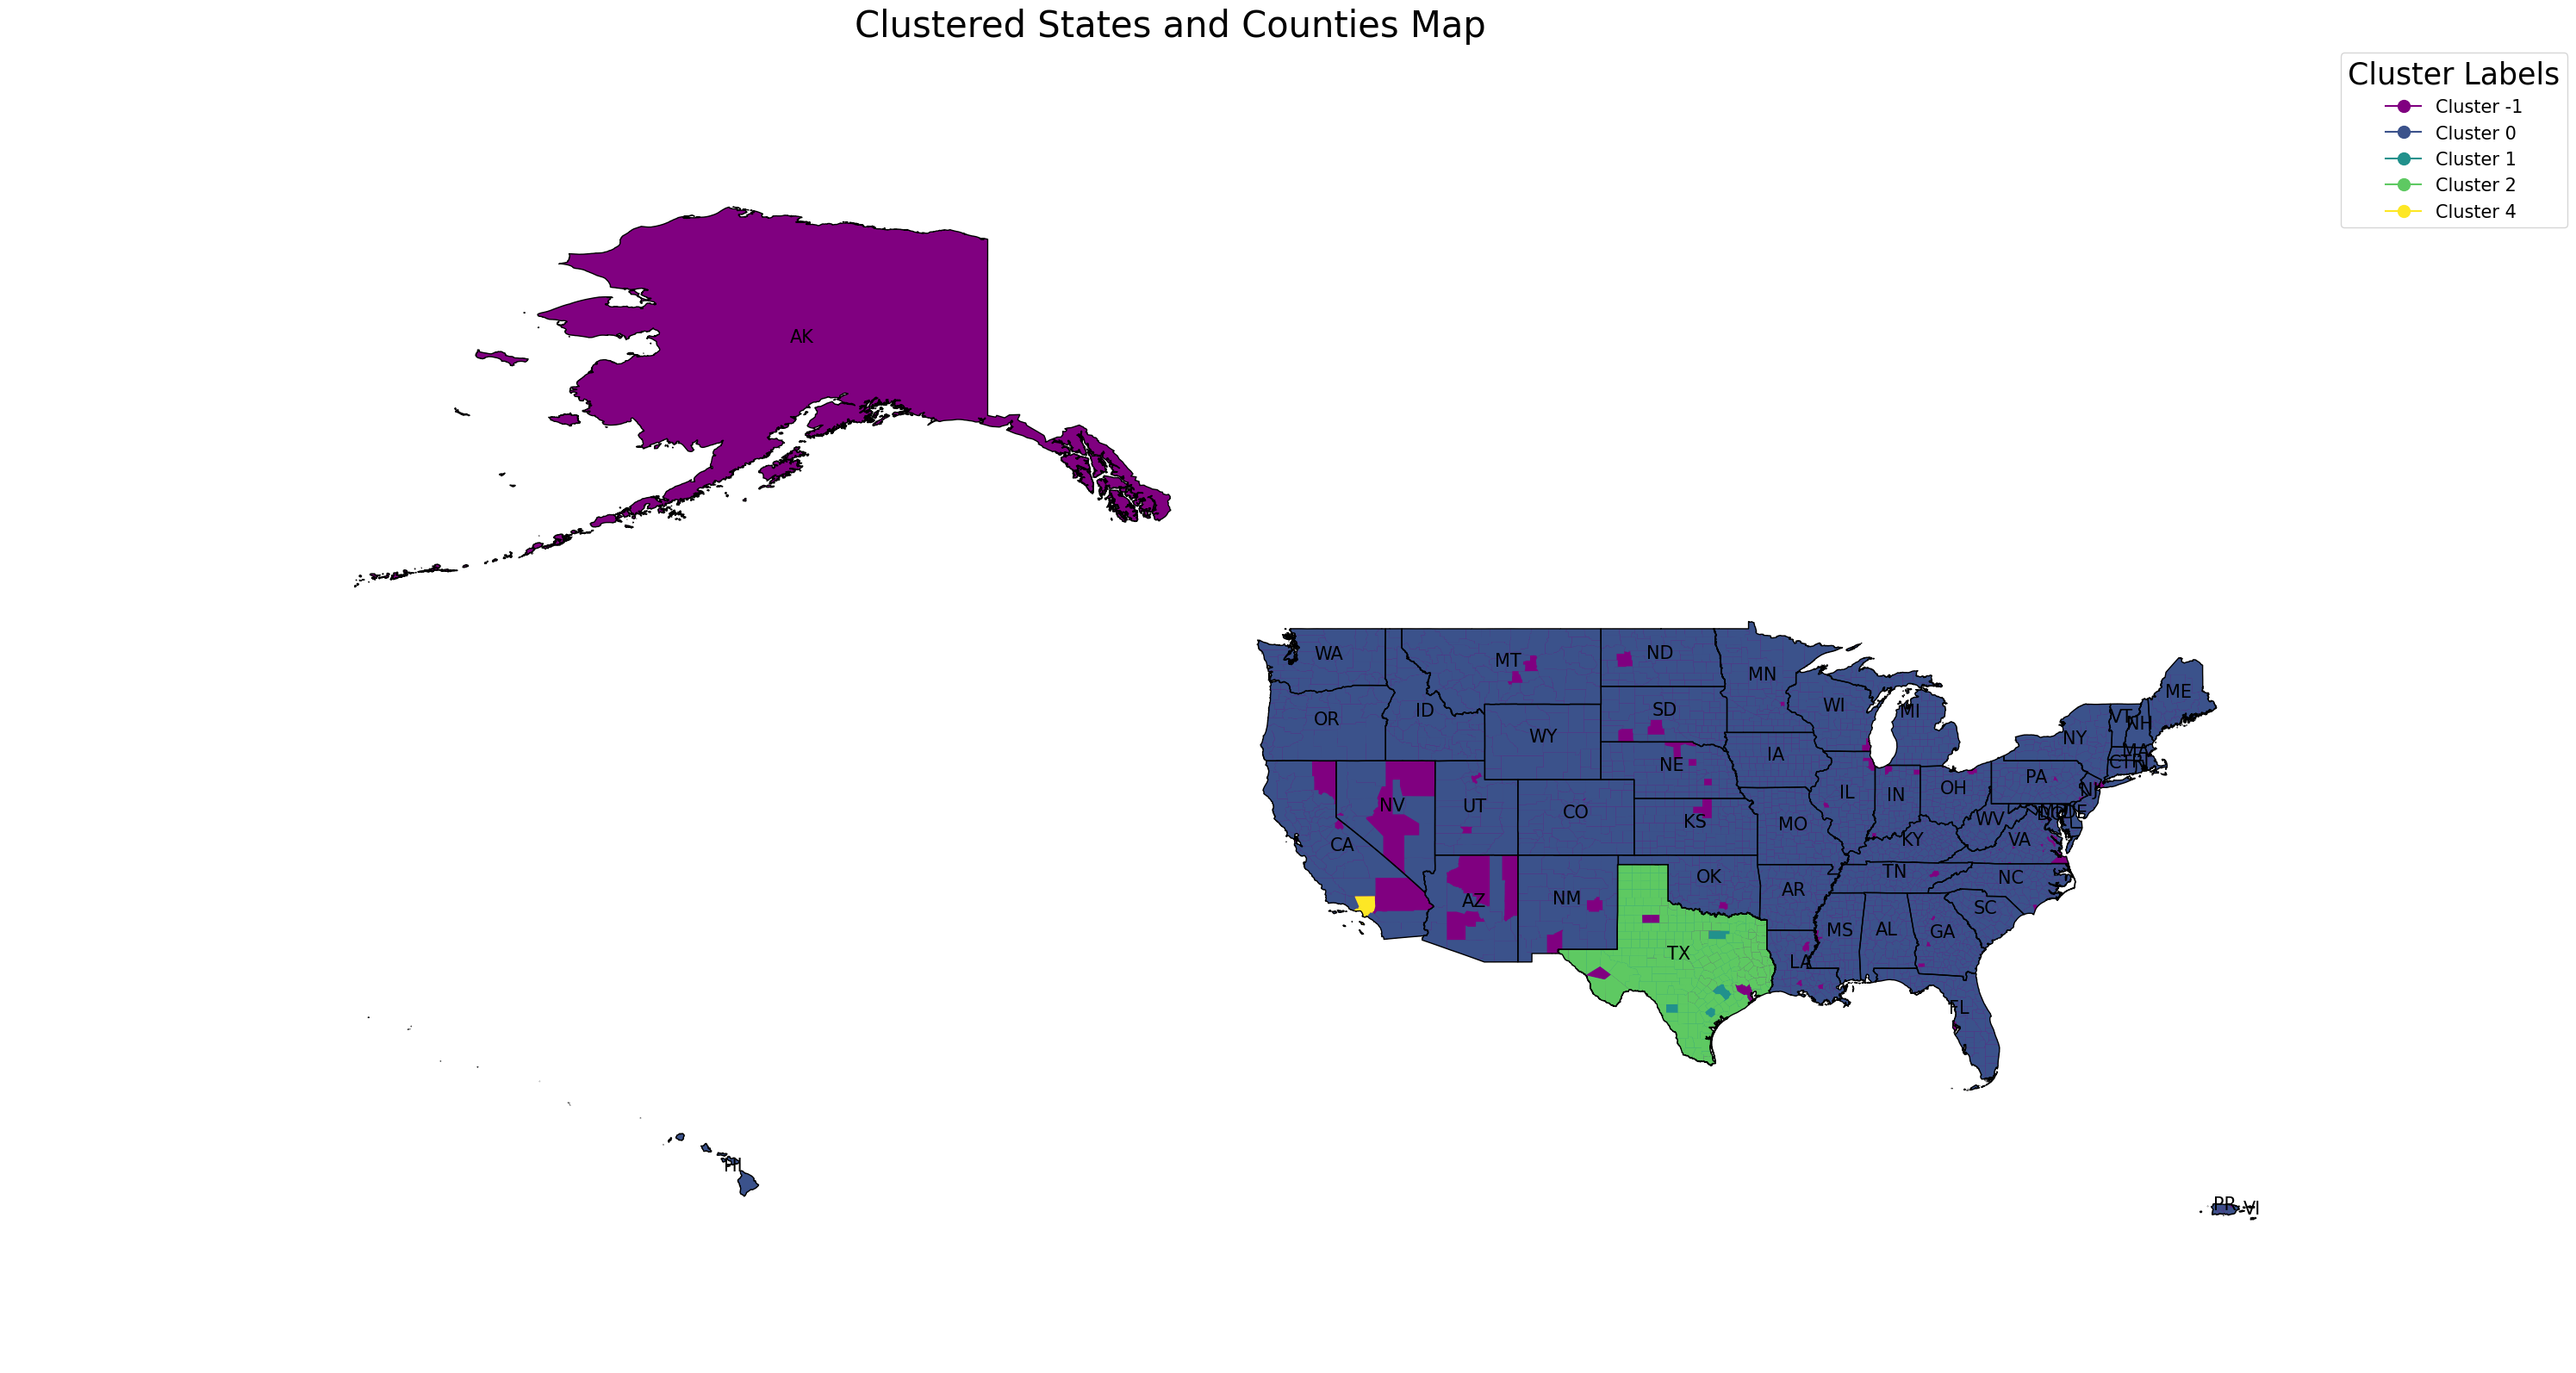

In [ ]:
# colormap_dbscan = ListedColormap(plt.cm.viridis(np.linspace(0, 1, num_colors_dbscan)))
# colormap_dbscan = ListedColormap([colormap(i / len(unique_clusters_dbscan)) for i in range(num_colors_dbscan)])
# norm_dbscan = BoundaryNorm(range(num_colors_dbscan+1), colormap_dbscan.N)
# norm_dbscan = BoundaryNorm(range(2), colormap_dbscan.N)

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 50))

# Plot the counties with clusters colored according to 'Cluster_Color'
# state_gdf_match_db.plot(column='dbscan_cluster', ax=ax, cmap=colormap_dbscan, norm=norm_dbscan, legend=False)
state_cluster_neg_1.plot(column='dbscan_cluster', ax=ax, color=(0.5019607843137255, 0.0, 0.5019607843137255, 1.0), legend=False)
state_cluster_0.plot(column='dbscan_cluster', ax=ax, color=(0.229739, 0.322361, 0.545706, 1.0), legend=False)
state_cluster_1.plot(column='dbscan_cluster', ax=ax, color=(0.127568, 0.566949, 0.550556, 1.0), legend=False)


# Plot the counties with clusters colored according to 'dbscan_cluster_colors'
# cluster_0.plot(column='dbscan_cluster', ax=ax, cmap=colormap_dbscan, norm=norm_dbscan, legend=False)
cluster_neg_1.plot(column='dbscan_cluster', ax=ax, color=(0.5019607843137255, 0.0, 0.5019607843137255, 1.0), legend=False)
cluster_0.plot(column='dbscan_cluster', ax=ax, color=(0.229739, 0.322361, 0.545706, 1.0), legend=False)
# cluster_1.plot(column='dbscan_cluster', ax=ax, color=(0.127568, 0.566949, 0.550556, 1.0), legend=False) # nothing in this
cluster_2.plot(column='dbscan_cluster', ax=ax, color=(0.369214, 0.788888, 0.382914, 1.0), legend=False)
cluster_4.plot(column='dbscan_cluster', ax=ax, color=(0.993248, 0.906157, 0.143936, 1.0), legend=False)



# Overlay state boundaries
state_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Annotate with state abbreviations
for idx, row in state_boundaries_gdf.iterrows():
    state_name = fips_to_state_abbrev.get(idx, 'Unknown')  # idx should be the state FIPS code
    if not row.geometry.is_empty and isinstance(row.geometry, (Polygon, MultiPolygon)):
        plt.annotate(text=state_name, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', fontsize=15, color='black')

# Set the bounds for the axes
ax.set_xlim((-200, -60))
ax.set_ylim((10, 80))

# Create a custom legend
legend_labels_dbscan = [f'Cluster {cluster}' for cluster in cluster_colors_dbscan.keys()]
legend_colors_dbscan = [cluster_colors_dbscan[cluster] for cluster in cluster_colors_dbscan.keys()]
legend_handles_dbscan = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=label)
                  for label, color in zip(legend_labels_dbscan, legend_colors_dbscan)]
ax.legend(handles=legend_handles_dbscan, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1, 1),
          fontsize='15', title_fontsize='25')

# Set the title and turn off the axis
plt.title('Clustered States and Counties Map', fontsize=30)
plt.axis('off')
plt.tight_layout()

# Show the plot
plt.show()

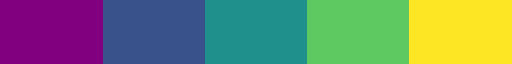

In [ ]:
colormap_dbscan

In [ ]:
cluster_0 = matching_counties_gdf[matching_counties_gdf['dbscan_cluster'] == 0]
cluster_0.drop_duplicates(subset=['geometry'], inplace=True)
np.unique(cluster_0['db_cluster_colors'])

<ipython-input-237-6eead6fad7bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0.drop_duplicates(subset=['geometry'], inplace=True)


array([(0.229739, 0.322361, 0.545706, 1.0)], dtype=object)

- The white areas are noise (dbscan_cluster == -1)
- `Cluster 2` and `Cluster 3` mostly have same areas, so `Cluster 2` (Orange) and `Cluster 3` (light blue) aren't displayed.
- Cluster 4

**Cluster 4:**
- State: CA, Names: LOS ANGELES.

**Cluster 2:**
- State: TX, Names: ARMSTRONG, BEE, BOSQUE, BURNET, CALDWELL, COLEMAN, CRANE, EL PASO, FISHER, FREESTONE, HARDIN, HENDERSON, HUDSPETH, JASPER, JEFFERSON, KENEDY, LEON, MARTIN, MILLS, NACOGDOCHES, ORANGE, PECOS, ROBERTSON, SMITH, STARR, TYLER, WALKER, WARD, WASHINGTON, WOOD, ARANSAS, SAN SABA, STEPHENS, TITUS, TRAVIS, TRINITY, VAN ZANDT, WALLER, WEBB, ANDERSON, ANGELINA, BEXAR, BOWIE, BREWSTER, BURLESON, CALHOUN, CASS, COMAL, CULBERSON, DELTA, GLASSCOCK, GUADALUPE, HARTLEY, HIDALGO, HOUSTON, KENT, KLEBERG, LEE, LOVING, MCMULLEN, MARION, MONTGOMERY, MORRIS, NAVARRO, POLK, PRESIDIO, REAGAN, SAN AUGUSTINE, SAN JACINTO, ECTOR, HARRISON, MAVERICK, NEWTON, RAINS, SAN PATRICIO, VAL VERDE, CARSON, FORT BEND, SHELBY, DONLEY, MADISON, YOUNG, BRAZOS, COCHRAN, MOORE, AUSTIN, LAMAR, REFUGIO, VICTORIA, CAMERON, GRIMES, JACKSON, REEVES, LA SALLE, RUSK, UPSHUR, MCLENNAN, MONTAGUE, NUECES, KNOX, TAYLOR, TOM GREEN, BRISCOE, FALLS, REAL, RUNNELS, COMANCHE, WICHITA, WILLACY, BROWN, CASTRO, JOHNSON, HUNT, LAMB, WISE, SCHLEICHER, BAILEY, DUVAL, ERATH, FRIO, GAINES, GRAY, LAVACA, LUBBOCK, PANOLA, ARCHER, SHACKELFORD, SHERMAN, STERLING, SUTTON, PARMER, RANDALL, WILBARGER, WILSON, ELLIS, SABINE, WHARTON, NOLAN, OCHILTREE, PARKER, HOOD, HOWARD, COOKE, TERRY, WHEELER, DIMMIT, FOARD, GREGG, HALE, KIMBLE, KINNEY, GONZALES, HALL, HOCKLEY, KAUFMAN, JIM HOGG, BASTROP, HARDEMAN, HAYS, HUTCHINSON, MCCULLOCH, DEWITT, CLAY, COKE, COLLINGSWORTH, IRION, JIM WELLS, LAMPASAS, LIBERTY, JONES, COLLIN, CONCHO, DALLAM, DAWSON, BROOKS, CROCKETT, DENTON, EASTLAND, KING, MENARD, THROCKMORTON, LYNN, MILAM, PALO PINTO, EDWARDS, HILL, LLANO, BELL, POTTER, UPTON, WINKLER, SCURRY, HAMILTON, STONEWALL, ZAPATA, CALLAHAN, CORYELL, MASON, OLDHAM, SOMERVELL, ROBERTS, ATASCOSA, BAYLOR, BORDEN, CHAMBERS, BANDERA, GRAYSON, HANSFORD, HEMPHILL, LIPSCOMB, LIVE OAK, COTTLE, KENDALL, UVALDE, MEDINA, MIDLAND, MITCHELL, TERRELL, WILLIAMSON, FRANKLIN, BRAZORIA, HOPKINS, MATAGORDA, RED RIVER, ANDREWS, KERR, LIMESTONE, SWISHER, CHILDRESS, JACK, CAMP, KARNES, FLOYD, GARZA, HASKELL, MOTLEY, CHEROKEE, BLANCO, YOAKUM, DEAF SMITH, FANNIN, GILLESPIE

**Cluster 3:**
- State: TX, Names: ARMSTRONG, BEE, BOSQUE, BURNET, CALDWELL, COLEMAN, CRANE, EL PASO, FISHER, FREESTONE, HARDIN, HENDERSON, HUDSPETH, JASPER, JEFFERSON, KENEDY, LEON, MARTIN, MILLS, NACOGDOCHES, ORANGE, PECOS, ROBERTSON, SMITH, STARR, TYLER, WALKER, WARD, WASHINGTON, WOOD, ARANSAS, SAN SABA, STEPHENS, TITUS, TRAVIS, TRINITY, VAN ZANDT, WALLER, WEBB, ANDERSON, ANGELINA, BEXAR, BOWIE, BREWSTER, BURLESON, CALHOUN, CASS, COMAL, CULBERSON, DELTA, GLASSCOCK, GUADALUPE, HARTLEY, HIDALGO, HOUSTON, KENT, KLEBERG, LEE, LOVING, MCMULLEN, MARION, MONTGOMERY, MORRIS, NAVARRO, POLK, PRESIDIO, REAGAN, SAN AUGUSTINE, SAN JACINTO, ECTOR, HARRISON, MAVERICK, NEWTON, RAINS, SAN PATRICIO, VAL VERDE, CARSON, FORT BEND, SHELBY, DONLEY, MADISON, YOUNG, BRAZOS, COCHRAN, MOORE, AUSTIN, LAMAR, REFUGIO, VICTORIA, CAMERON, GRIMES, JACKSON, REEVES, LA SALLE, RUSK, UPSHUR, MCLENNAN, MONTAGUE, NUECES, KNOX, TAYLOR, TOM GREEN, BRISCOE, FALLS, REAL, RUNNELS, COMANCHE, WICHITA, WILLACY, BROWN, CASTRO, JOHNSON, HUNT, LAMB, WISE, SCHLEICHER, BAILEY, DUVAL, ERATH, FRIO, GAINES, GRAY, LAVACA, LUBBOCK, PANOLA, ARCHER, SHACKELFORD, SHERMAN, STERLING, SUTTON, PARMER, RANDALL, WILBARGER, WILSON, ELLIS, SABINE, WHARTON, NOLAN, OCHILTREE, PARKER, HOOD, HOWARD, COOKE, TERRY, WHEELER, DIMMIT, FOARD, GREGG, HALE, KIMBLE, KINNEY, GONZALES, HALL, HOCKLEY, KAUFMAN, JIM HOGG, BASTROP, HARDEMAN, HAYS, HUTCHINSON, MCCULLOCH, DEWITT, CLAY, COKE, COLLINGSWORTH, IRION, JIM WELLS, LAMPASAS, LIBERTY, JONES, COLLIN, CONCHO, DALLAM, DAWSON, BROOKS, CROCKETT, DENTON, EASTLAND, KING, MENARD, THROCKMORTON, LYNN, MILAM, PALO PINTO, EDWARDS, HILL, LLANO, BELL, POTTER, UPTON, WINKLER, SCURRY, HAMILTON, STONEWALL, ZAPATA, CALLAHAN, CORYELL, MASON, OLDHAM, SOMERVELL, ROBERTS, ATASCOSA, BAYLOR, BORDEN, CHAMBERS, BANDERA, GRAYSON, HANSFORD, HEMPHILL, LIPSCOMB, LIVE OAK, COTTLE, KENDALL, UVALDE, MEDINA, MIDLAND, MITCHELL, TERRELL, WILLIAMSON, FRANKLIN, BRAZORIA, HOPKINS, MATAGORDA, RED RIVER, ANDREWS, KERR, LIMESTONE, SWISHER, CHILDRESS, JACK, CAMP, KARNES, FLOYD, GARZA, HASKELL, MOTLEY, CHEROKEE, BLANCO, YOAKUM, DEAF SMITH, FANNIN, GILLESPIE

In [ ]:
'''# Add cluster labels to your DataFrame
principal_components_optimal_df_dbscan['cluster'] = cluster_labels_dbscan

# Iterate through each cluster, excluding noise points
for cluster_label in unique_clusters:
    # Filter the DataFrame for the current cluster
    cluster_db = dataset[principal_components_optimal_df_dbscan['cluster'] == cluster_label]
    print(f"Cluster {cluster_label} contains {cluster_db.shape[0]} samples.")

    # List of columns you want to analyze
    columns_to_analyze = ['year', 'duration', 'avg_Durability_Weight', 'avg_SupStruc', 'tower_count']

    # Calculate and print summary statistics for selected columns
    cluster_stats = cluster_db[columns_to_analyze].describe()
    print(cluster_stats)'''

'# Add cluster labels to your DataFrame\nprincipal_components_optimal_df_dbscan[\'cluster\'] = cluster_labels_dbscan\n\n# Iterate through each cluster, excluding noise points\nfor cluster_label in unique_clusters:\n    # Filter the DataFrame for the current cluster\n    cluster_db = dataset[principal_components_optimal_df_dbscan[\'cluster\'] == cluster_label]\n    print(f"Cluster {cluster_label} contains {cluster_db.shape[0]} samples.")\n\n    # List of columns you want to analyze\n    columns_to_analyze = [\'year\', \'duration\', \'avg_Durability_Weight\', \'avg_SupStruc\', \'tower_count\']\n\n    # Calculate and print summary statistics for selected columns\n    cluster_stats = cluster_db[columns_to_analyze].describe()\n    print(cluster_stats)'